In [2]:
# useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# import scripts
from proj1_helpers import *
from classifiers import *
from solver import *
from implementations import *

## Open data

In [4]:
# fetch train data
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids, features = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
X = tX

In [ ]:
print(features)

## Feature engineering

In [5]:
# additive binarization of NaN values
feats_binarization = ['DER_mass_mmc','DER_deltaeta_jet_jet','PRI_jet_leading_pt']

# removing unnecessary features
feats_removal = ['DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet','DER_lep_eta_centrality',
                 'PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_pt',
                 'PRI_jet_subleading_eta','PRI_jet_subleading_phi']

### Handling case by case

In [6]:
# handling case A
X_A = X.copy()

# handling case B
X_B = X.copy()
X_B, mean_B, std_B = standardize(X_B)
X_B = np.c_[np.ones(len(y)), X_B]

# handling case C
X_C = X.copy()
X_C = replace_NaN_by_median(X_C)
X_C, mean_C, std_C = standardize(X_C)
X_C = np.c_[np.ones(len(y)), X_C]

# handling case D
X_D = X.copy()
X_D, features_D = binarize_undefined(X_D, features, feats_binarization)
X_D, features_D = remove_features(X_D, features_D, feats_removal)
X_D = replace_NaN_by_median(X_D) # only for DER_mass_mmc
X_D, mean_D, std_D = standardize(X_D)
X_D = np.c_[np.ones(len(y)), X_D]

# handling case E
# in this model, if 'DER_mass_mmc' (first feature) is NaN, we predict background
X_E = X.copy()
X_E, _ = remove_features(X_E, features, feats_removal)
#X_E, mean_E, std_E = standardize(X_E)
X_E = np.c_[np.ones(len(y)), X_E]

# handling case F
X_F = X.copy()

# handling case G
X_G = X.copy()

## Fit and predict

* A - base
* B - base + offset + standardisation
* C - base + offset + standardisation + NaN to median
* D - base + offset + standardisation + additive binarization + removal of 10 NaN values + median for DER_mass_mmc
* E - C or D + decision tree
* F - E + feature augmentation (L2 Kernels)
* G - E + feature augmentation (L1 polynomial manually coded)

In [12]:
# choice of classifier
classifier = LogisticRegression(max_evaluations=300, verbose=True)
classifier_E = LogisticRegressionDecisionTree(1, verbose=True)

ratio = 0.8
k = 20
    
accuracy_A = cross_validate_kfold(y, X_A, classifier, k)
accuracy_B = cross_validate_kfold(y, X_B, classifier, k)
accuracy_C = cross_validate_kfold(y, X_C, classifier, k)
accuracy_D = cross_validate_kfold(y, X_D, classifier, k)
accuracy_E = cross_validate_kfold(y, X_E, classifier_E, k)
accuracy_F = cross_validate_kfold(y, X_F, classifier, k)
accuracy_G = cross_validate_kfold(y, X_G, classifier, k)

accuracy = [accuracy_A, accuracy_B, accuracy_C, accuracy_D,
            accuracy_E, accuracy_F, accuracy_G]

f_new: 14124488527545490.000 - f: 164622.455 - Backtracking...
f_new: 2919855329079007.000 - f: 164622.455 - Backtracking...
f_new: 603600981823040.750 - f: 164622.455 - Backtracking...
f_new: 124778149682810.969 - f: 164622.455 - Backtracking...
f_new: 25794501859157.723 - f: 164622.455 - Backtracking...
f_new: 5332314430285.041 - f: 164622.455 - Backtracking...
f_new: 1102311560313.403 - f: 164622.455 - Backtracking...
f_new: 227873070187.910 - f: 164622.455 - Backtracking...
f_new: 47106603469.642 - f: 164622.455 - Backtracking...
f_new: 9738033972.338 - f: 164622.455 - Backtracking...
f_new: 2013094654.481 - f: 164622.455 - Backtracking...
f_new: 416172747.114 - f: 164622.455 - Backtracking...
f_new: 86052432.674 - f: 164622.455 - Backtracking...
f_new: 17809343.703 - f: 164622.455 - Backtracking...
f_new: 3709538.240 - f: 164622.455 - Backtracking...
f_new: 812727.525 - f: 164622.455 - Backtracking...
f_new: 227454.110 - f: 164622.455 - Backtracking...
18 - loss: 150946.623
19 - l

f_new: 25883927615356.160 - f: 164622.455 - Backtracking...
f_new: 5353718109887.750 - f: 164622.455 - Backtracking...
f_new: 1107339598377.190 - f: 164622.455 - Backtracking...
f_new: 229037286936.302 - f: 164622.455 - Backtracking...
f_new: 47373088092.199 - f: 164622.455 - Backtracking...
f_new: 9798461779.939 - f: 164622.455 - Backtracking...
f_new: 2026690835.514 - f: 164622.455 - Backtracking...
f_new: 419211817.965 - f: 164622.455 - Backtracking...
f_new: 86727930.148 - f: 164622.455 - Backtracking...
f_new: 17958752.412 - f: 164622.455 - Backtracking...
f_new: 3742323.601 - f: 164622.455 - Backtracking...
f_new: 819783.962 - f: 164622.455 - Backtracking...
f_new: 228802.607 - f: 164622.455 - Backtracking...
18 - loss: 150978.017
19 - loss: 148921.359
20 - loss: 148531.912
21 - loss: 148190.493
22 - loss: 145795.849
23 - loss: 144068.047
24 - loss: 143702.438
25 - loss: 143349.127
26 - loss: 143286.314
27 - loss: 143160.052
28 - loss: 141004.182
f_new: 142595.612 - f: 141004.182

f_new: 9752828828.314 - f: 164622.455 - Backtracking...
f_new: 2016353081.024 - f: 164622.455 - Backtracking...
f_new: 416887686.626 - f: 164622.455 - Backtracking...
f_new: 86208776.193 - f: 164622.455 - Backtracking...
f_new: 17843424.065 - f: 164622.455 - Backtracking...
f_new: 3716869.735 - f: 164622.455 - Backtracking...
f_new: 814251.518 - f: 164622.455 - Backtracking...
f_new: 227737.395 - f: 164622.455 - Backtracking...
18 - loss: 150951.160
19 - loss: 148938.435
20 - loss: 148550.731
21 - loss: 148208.166
22 - loss: 145767.907
23 - loss: 144121.064
24 - loss: 143682.457
25 - loss: 143368.350
26 - loss: 143305.540
27 - loss: 143175.352
28 - loss: 140997.119
f_new: 143153.588 - f: 140997.119 - Backtracking...
30 - loss: 140893.568
31 - loss: 140785.314
32 - loss: 140768.378
33 - loss: 140750.708
34 - loss: 139256.571
35 - loss: 138337.382
f_new: 139124.400 - f: 138337.382 - Backtracking...
37 - loss: 138237.095
38 - loss: 138225.276
39 - loss: 138207.443
40 - loss: 138053.777
41

20 - loss: 148606.896
21 - loss: 148261.654
22 - loss: 145656.286
23 - loss: 144265.297
24 - loss: 143597.805
25 - loss: 143362.141
26 - loss: 143300.984
27 - loss: 143171.662
28 - loss: 141002.871
f_new: 144329.535 - f: 141002.871 - Backtracking...
30 - loss: 140926.764
31 - loss: 140844.386
32 - loss: 140827.828
33 - loss: 140799.171
34 - loss: 138966.257
35 - loss: 138369.073
f_new: 140022.090 - f: 138369.073 - Backtracking...
37 - loss: 138237.935
38 - loss: 138211.911
39 - loss: 138186.848
40 - loss: 137963.057
41 - loss: 137834.108
42 - loss: 137800.755
43 - loss: 137729.877
44 - loss: 137724.140
45 - loss: 137718.672
46 - loss: 137565.118
47 - loss: 137384.989
48 - loss: 137300.538
49 - loss: 137290.480
50 - loss: 137284.599
51 - loss: 137279.942
52 - loss: 137216.194
53 - loss: 137144.576
54 - loss: 136800.512
55 - loss: 136793.644
56 - loss: 136735.557
57 - loss: 136731.249
58 - loss: 136722.597
59 - loss: 135949.842
60 - loss: 135469.605
f_new: 135979.802 - f: 135469.605 - Ba

32 - loss: 140753.953
33 - loss: 140734.510
34 - loss: 139102.130
35 - loss: 138534.468
f_new: 140785.223 - f: 138534.468 - Backtracking...
37 - loss: 138416.904
38 - loss: 138354.790
39 - loss: 138312.141
40 - loss: 138102.083
41 - loss: 138000.763
42 - loss: 137971.114
43 - loss: 137925.928
44 - loss: 137919.819
45 - loss: 137913.149
46 - loss: 137690.659
47 - loss: 137482.344
48 - loss: 137455.344
49 - loss: 137437.062
50 - loss: 137432.247
51 - loss: 137393.176
52 - loss: 134166.065
f_new: 135155.529 - f: 134166.065 - Backtracking...
54 - loss: 133527.998
55 - loss: 133288.710
56 - loss: 133143.235
57 - loss: 133135.535
58 - loss: 133119.035
59 - loss: 133057.479
60 - loss: 133013.410
61 - loss: 133007.700
62 - loss: 133002.290
63 - loss: 132999.420
64 - loss: 132919.438
65 - loss: 132801.564
66 - loss: 132724.506
67 - loss: 132703.292
68 - loss: 132700.327
69 - loss: 132697.862
70 - loss: 132672.030
71 - loss: 132646.614
72 - loss: 131774.992
f_new: 132274.515 - f: 131774.992 - Ba

44 - loss: 137929.146
45 - loss: 137922.288
46 - loss: 137702.592
47 - loss: 137498.484
48 - loss: 137480.654
49 - loss: 137468.601
50 - loss: 137463.798
51 - loss: 137166.939
52 - loss: 135222.777
f_new: 137261.335 - f: 135222.777 - Backtracking...
54 - loss: 135193.568
55 - loss: 135174.679
56 - loss: 135167.964
57 - loss: 135161.481
58 - loss: 135114.164
59 - loss: 135076.744
60 - loss: 135070.524
61 - loss: 135067.092
62 - loss: 135063.692
63 - loss: 134589.356
64 - loss: 130943.449
f_new: 169137.210 - f: 130943.449 - Backtracking...
66 - loss: 130923.907
67 - loss: 130921.602
68 - loss: 130918.342
69 - loss: 130840.753
70 - loss: 130777.654
71 - loss: 130774.601
72 - loss: 130771.494
73 - loss: 130769.962
74 - loss: 130755.096
75 - loss: 130735.497
76 - loss: 130548.460
f_new: 130611.969 - f: 130548.460 - Backtracking...
78 - loss: 130540.523
79 - loss: 130532.560
80 - loss: 130531.169
81 - loss: 130523.393
82 - loss: 129194.041
83 - loss: 128969.205
f_new: 133602.023 - f: 128969.

52 - loss: 136904.042
53 - loss: 136708.836
54 - loss: 136528.594
55 - loss: 136506.888
56 - loss: 136495.939
57 - loss: 136491.684
58 - loss: 136419.108
59 - loss: 131505.988
f_new: 157890.784 - f: 131505.988 - Backtracking...
61 - loss: 131415.938
62 - loss: 131275.499
63 - loss: 131262.368
64 - loss: 131257.930
65 - loss: 131229.931
66 - loss: 131210.490
67 - loss: 131190.893
68 - loss: 131188.682
69 - loss: 131186.985
70 - loss: 131185.221
71 - loss: 130936.297
72 - loss: 130703.576
f_new: 130844.439 - f: 130703.576 - Backtracking...
74 - loss: 130699.090
75 - loss: 130695.049
76 - loss: 130693.349
77 - loss: 130679.786
78 - loss: 130614.478
79 - loss: 130551.397
80 - loss: 130543.249
81 - loss: 130540.579
82 - loss: 130539.147
83 - loss: 130520.333
84 - loss: 129133.793
f_new: 130657.556 - f: 129133.793 - Backtracking...
86 - loss: 128555.728
f_new: 129853.494 - f: 128555.728 - Backtracking...
88 - loss: 128391.507
89 - loss: 128313.210
90 - loss: 128258.384
91 - loss: 128036.709


65 - loss: 135313.144
66 - loss: 135251.659
67 - loss: 135183.193
68 - loss: 135073.036
69 - loss: 135065.908
70 - loss: 135061.900
71 - loss: 135058.544
72 - loss: 134979.706
73 - loss: 134874.795
74 - loss: 134788.465
75 - loss: 134763.520
76 - loss: 134756.958
77 - loss: 134753.746
78 - loss: 134750.290
79 - loss: 134505.044
80 - loss: 134235.087
81 - loss: 134184.372
82 - loss: 134177.095
83 - loss: 134153.521
84 - loss: 134150.598
85 - loss: 134147.328
86 - loss: 133952.566
87 - loss: 133729.702
88 - loss: 133691.083
f_new: 133691.170 - f: 133691.083 - Backtracking...
90 - loss: 133683.891
91 - loss: 133680.702
92 - loss: 133677.981
93 - loss: 133643.740
94 - loss: 133607.437
95 - loss: 133316.908
f_new: 133357.527 - f: 133316.908 - Backtracking...
97 - loss: 133296.789
98 - loss: 133276.552
99 - loss: 133274.043
100 - loss: 133269.163
101 - loss: 132759.439
102 - loss: 132379.548
f_new: 132790.181 - f: 132379.548 - Backtracking...
104 - loss: 132287.563
105 - loss: 132227.340
106

76 - loss: 133163.024
77 - loss: 133160.391
78 - loss: 133157.926
79 - loss: 133112.074
80 - loss: 133061.456
81 - loss: 132987.943
82 - loss: 132937.540
83 - loss: 132932.322
84 - loss: 132929.931
85 - loss: 132927.533
86 - loss: 132877.816
87 - loss: 132823.157
88 - loss: 132764.714
89 - loss: 132715.448
90 - loss: 132707.787
91 - loss: 132704.922
92 - loss: 132702.667
93 - loss: 132681.649
94 - loss: 132609.364
95 - loss: 131129.863
f_new: 137494.749 - f: 131129.863 - Backtracking...
97 - loss: 131124.773
98 - loss: 131120.153
99 - loss: 131118.064
100 - loss: 131110.623
101 - loss: 131091.771
102 - loss: 131073.898
103 - loss: 131071.871
104 - loss: 131070.261
105 - loss: 131068.588
106 - loss: 127495.300
f_new: 479484.087 - f: 127495.300 - Backtracking...
f_new: 127499.646 - f: 127495.300 - Backtracking...
109 - loss: 127493.979
110 - loss: 127493.289
111 - loss: 127492.727
112 - loss: 127476.645
113 - loss: 127460.146
114 - loss: 127452.131
115 - loss: 127447.765
116 - loss: 1274

91 - loss: 129720.453
92 - loss: 129705.573
93 - loss: 129704.288
94 - loss: 129702.948
95 - loss: 129653.833
96 - loss: 129607.464
97 - loss: 129588.726
98 - loss: 129585.048
99 - loss: 129583.981
100 - loss: 129582.750
101 - loss: 129516.019
102 - loss: 129438.410
103 - loss: 129423.182
104 - loss: 129418.473
105 - loss: 129414.042
106 - loss: 129413.029
107 - loss: 129411.645
108 - loss: 129379.108
109 - loss: 129340.589
110 - loss: 129322.579
111 - loss: 129319.623
112 - loss: 129318.266
113 - loss: 129317.277
114 - loss: 129307.343
115 - loss: 129288.340
116 - loss: 128466.813
f_new: 139232.410 - f: 128466.813 - Backtracking...
118 - loss: 128464.907
119 - loss: 128462.856
120 - loss: 128462.080
121 - loss: 128459.223
122 - loss: 128450.356
123 - loss: 128440.899
124 - loss: 128415.144
125 - loss: 128414.005
126 - loss: 128413.249
127 - loss: 128412.506
128 - loss: 127203.171
f_new: 197978.167 - f: 127203.171 - Backtracking...
130 - loss: 127199.599
131 - loss: 127191.159
132 - lo

96 - loss: 130109.259
97 - loss: 130106.118
98 - loss: 130051.024
99 - loss: 129998.848
100 - loss: 129989.162
101 - loss: 129986.559
102 - loss: 129985.365
103 - loss: 129980.738
104 - loss: 127534.517
f_new: 343864.179 - f: 127534.517 - Backtracking...
f_new: 127535.492 - f: 127534.517 - Backtracking...
107 - loss: 127532.756
108 - loss: 127531.172
109 - loss: 127530.614
110 - loss: 127529.778
111 - loss: 127523.571
112 - loss: 127517.403
113 - loss: 127492.718
114 - loss: 127491.756
115 - loss: 127491.166
116 - loss: 127490.656
117 - loss: 127258.240
118 - loss: 127014.081
f_new: 127782.561 - f: 127014.081 - Backtracking...
120 - loss: 126939.491
121 - loss: 126900.258
122 - loss: 126875.101
123 - loss: 126772.185
124 - loss: 126751.409
f_new: 126766.416 - f: 126751.409 - Backtracking...
126 - loss: 126749.423
127 - loss: 126748.326
128 - loss: 126747.462
129 - loss: 126715.622
130 - loss: 126697.086
131 - loss: 126696.345
132 - loss: 126694.898
133 - loss: 126694.555
134 - loss: 12

108 - loss: 132618.777
109 - loss: 132569.994
110 - loss: 132508.968
111 - loss: 132461.455
112 - loss: 132457.847
113 - loss: 132455.649
114 - loss: 132453.517
115 - loss: 132412.785
116 - loss: 132368.245
117 - loss: 132308.484
118 - loss: 132259.204
119 - loss: 132255.510
120 - loss: 132253.411
121 - loss: 132251.356
122 - loss: 132214.298
123 - loss: 132174.108
124 - loss: 132111.674
125 - loss: 132046.460
126 - loss: 132042.542
127 - loss: 132040.436
128 - loss: 132038.464
129 - loss: 132011.321
130 - loss: 131982.806
131 - loss: 131862.535
132 - loss: 131718.730
133 - loss: 131656.935
134 - loss: 131654.793
135 - loss: 131652.815
136 - loss: 131632.646
137 - loss: 131612.233
138 - loss: 131254.037
f_new: 131260.448 - f: 131254.037 - Backtracking...
140 - loss: 131248.679
141 - loss: 131246.842
142 - loss: 131245.198
143 - loss: 131054.511
144 - loss: 127098.356
f_new: 282962.674 - f: 127098.356 - Backtracking...
146 - loss: 127077.058
147 - loss: 127069.576
148 - loss: 127062.866

124 - loss: 129690.442
125 - loss: 129675.102
126 - loss: 129650.698
127 - loss: 129452.126
f_new: 129464.530 - f: 129452.126 - Backtracking...
129 - loss: 129449.875
130 - loss: 129447.990
131 - loss: 129446.930
132 - loss: 129436.275
133 - loss: 129422.846
134 - loss: 129162.901
f_new: 129492.491 - f: 129162.901 - Backtracking...
136 - loss: 129157.664
137 - loss: 129152.327
138 - loss: 129151.361
139 - loss: 129144.816
140 - loss: 127773.092
f_new: 146909.101 - f: 127773.092 - Backtracking...
142 - loss: 127720.521
f_new: 127740.206 - f: 127720.521 - Backtracking...
144 - loss: 127677.359
145 - loss: 127668.250
146 - loss: 127658.249
147 - loss: 127624.626
148 - loss: 127618.618
149 - loss: 127617.732
150 - loss: 127617.169
151 - loss: 127616.575
152 - loss: 127584.731
153 - loss: 127553.032
154 - loss: 127471.313
155 - loss: 127470.667
156 - loss: 127468.962
157 - loss: 127468.445
158 - loss: 127451.137
159 - loss: 127362.926
160 - loss: 127084.173
f_new: 127175.453 - f: 127084.173

135 - loss: 128871.137
136 - loss: 128870.235
137 - loss: 128831.068
138 - loss: 128664.473
139 - loss: 128640.412
140 - loss: 128634.131
141 - loss: 128627.715
142 - loss: 128625.992
143 - loss: 128625.156
144 - loss: 128617.706
145 - loss: 128602.373
146 - loss: 128434.644
f_new: 128548.692 - f: 128434.644 - Backtracking...
148 - loss: 128424.708
149 - loss: 128414.799
150 - loss: 128414.001
151 - loss: 128413.150
152 - loss: 128403.529
153 - loss: 128393.723
154 - loss: 128307.190
155 - loss: 128305.727
156 - loss: 128300.340
157 - loss: 128299.595
158 - loss: 128290.702
159 - loss: 127562.971
f_new: 170481.710 - f: 127562.971 - Backtracking...
161 - loss: 127510.660
162 - loss: 127464.102
163 - loss: 127463.402
164 - loss: 127462.747
165 - loss: 127456.501
166 - loss: 127450.581
167 - loss: 127430.708
168 - loss: 127429.886
169 - loss: 127429.345
170 - loss: 127428.819
171 - loss: 126324.671
f_new: 283699.358 - f: 126324.671 - Backtracking...
173 - loss: 126324.588
174 - loss: 1263

144 - loss: 125290.199
f_new: 413869.254 - f: 125290.199 - Backtracking...
f_new: 125290.655 - f: 125290.199 - Backtracking...
147 - loss: 125289.999
148 - loss: 125289.882
149 - loss: 125289.795
150 - loss: 125289.017
151 - loss: 125288.263
152 - loss: 125287.531
153 - loss: 125287.451
154 - loss: 125287.384
155 - loss: 125287.311
156 - loss: 125270.489
157 - loss: 125254.226
f_new: 125260.011 - f: 125254.226 - Backtracking...
159 - loss: 125254.064
160 - loss: 125253.914
161 - loss: 125253.850
162 - loss: 125251.136
163 - loss: 125245.259
164 - loss: 125240.105
165 - loss: 125239.700
166 - loss: 125239.624
167 - loss: 125239.558
168 - loss: 125238.864
169 - loss: 125238.192
170 - loss: 125188.274
f_new: 125200.367 - f: 125188.274 - Backtracking...
172 - loss: 125188.143
173 - loss: 125188.074
174 - loss: 125188.018
175 - loss: 125141.290
176 - loss: 125054.991
f_new: 125240.222 - f: 125054.991 - Backtracking...
178 - loss: 124964.308
179 - loss: 124917.837
180 - loss: 124901.510
181 

145 - loss: 127721.991
146 - loss: 127690.894
147 - loss: 127683.775
148 - loss: 127682.653
149 - loss: 127681.964
150 - loss: 127681.340
151 - loss: 127655.507
152 - loss: 127630.115
153 - loss: 127563.184
154 - loss: 127553.743
155 - loss: 127553.159
156 - loss: 127552.619
157 - loss: 127527.219
158 - loss: 126803.737
f_new: 127839.976 - f: 126803.737 - Backtracking...
160 - loss: 126794.591
f_new: 126805.309 - f: 126794.591 - Backtracking...
162 - loss: 126793.610
163 - loss: 126792.946
164 - loss: 126792.501
165 - loss: 126788.969
166 - loss: 126784.967
167 - loss: 126780.856
168 - loss: 126780.434
169 - loss: 126780.076
170 - loss: 126779.696
171 - loss: 125461.309
f_new: 427084.774 - f: 125461.309 - Backtracking...
f_new: 125461.759 - f: 125461.309 - Backtracking...
174 - loss: 125461.066
175 - loss: 125460.904
176 - loss: 125460.787
177 - loss: 125456.223
178 - loss: 125451.844
179 - loss: 125444.186
180 - loss: 125443.591
181 - loss: 125443.497
182 - loss: 125443.403
183 - loss

150 - loss: 125847.839
151 - loss: 125847.634
152 - loss: 125847.467
153 - loss: 125847.295
154 - loss: 125787.437
155 - loss: 125733.851
f_new: 125809.458 - f: 125733.851 - Backtracking...
157 - loss: 125733.072
158 - loss: 125732.411
159 - loss: 125732.096
160 - loss: 125729.961
161 - loss: 125721.175
162 - loss: 125715.648
163 - loss: 125714.635
164 - loss: 125714.482
165 - loss: 125714.330
166 - loss: 125712.661
167 - loss: 125710.996
168 - loss: 125683.524
f_new: 125690.814 - f: 125683.524 - Backtracking...
170 - loss: 125679.357
171 - loss: 125675.238
172 - loss: 125675.101
173 - loss: 125674.955
174 - loss: 125670.267
175 - loss: 125664.893
176 - loss: 125662.537
177 - loss: 125661.606
178 - loss: 125661.423
179 - loss: 125661.289
180 - loss: 125661.103
181 - loss: 125654.959
182 - loss: 125647.483
183 - loss: 125645.389
184 - loss: 125643.885
185 - loss: 125642.312
186 - loss: 125642.148
187 - loss: 125642.015
188 - loss: 125641.879
189 - loss: 125142.195
f_new: 206291.851 - f:

160 - loss: 125452.895
161 - loss: 125452.785
162 - loss: 125451.633
163 - loss: 125450.457
164 - loss: 125425.937
f_new: 125466.925 - f: 125425.937 - Backtracking...
166 - loss: 125419.255
167 - loss: 125412.541
168 - loss: 125412.441
169 - loss: 125412.340
170 - loss: 125409.312
171 - loss: 125405.773
172 - loss: 125403.902
173 - loss: 125402.890
174 - loss: 125402.769
175 - loss: 125402.671
176 - loss: 125402.570
177 - loss: 125284.369
f_new: 125738.990 - f: 125284.369 - Backtracking...
179 - loss: 125277.015
f_new: 125280.108 - f: 125277.015 - Backtracking...
181 - loss: 125274.101
182 - loss: 125272.328
183 - loss: 125271.761
184 - loss: 125271.326
185 - loss: 125269.032
186 - loss: 125268.140
187 - loss: 125268.045
188 - loss: 125267.963
189 - loss: 125267.878
190 - loss: 124689.378
f_new: 347844.717 - f: 124689.378 - Backtracking...
f_new: 124689.418 - f: 124689.378 - Backtracking...
193 - loss: 124689.307
194 - loss: 124689.245
195 - loss: 124689.212
196 - loss: 124687.878
197 

165 - loss: 126259.678
166 - loss: 126256.523
167 - loss: 126253.301
168 - loss: 126212.778
169 - loss: 125556.318
f_new: 126625.102 - f: 125556.318 - Backtracking...
171 - loss: 125524.052
172 - loss: 125518.772
173 - loss: 125511.048
174 - loss: 125493.772
175 - loss: 125492.780
176 - loss: 125492.346
177 - loss: 125492.228
178 - loss: 125491.971
179 - loss: 125478.107
180 - loss: 125464.341
181 - loss: 125453.348
182 - loss: 125451.726
183 - loss: 125451.605
184 - loss: 125451.493
185 - loss: 125446.697
186 - loss: 125441.468
187 - loss: 125439.652
188 - loss: 125438.405
189 - loss: 125438.035
190 - loss: 125437.921
191 - loss: 125437.813
192 - loss: 125433.828
193 - loss: 125189.505
f_new: 126432.556 - f: 125189.505 - Backtracking...
195 - loss: 125187.981
f_new: 125189.999 - f: 125187.981 - Backtracking...
197 - loss: 125187.712
198 - loss: 125187.572
199 - loss: 125187.464
200 - loss: 125186.545
201 - loss: 125185.717
202 - loss: 125185.499
203 - loss: 125185.423
204 - loss: 1251

f_new: 126426.442 - f: 126425.285 - Backtracking...
172 - loss: 126422.009
173 - loss: 126418.741
174 - loss: 126418.455
175 - loss: 126418.034
176 - loss: 126378.048
177 - loss: 126334.160
178 - loss: 126330.747
179 - loss: 126329.914
180 - loss: 126327.658
181 - loss: 126327.383
182 - loss: 126324.810
183 - loss: 126321.372
184 - loss: 126309.812
185 - loss: 126303.294
186 - loss: 126302.184
187 - loss: 126301.923
188 - loss: 126301.632
189 - loss: 126277.107
190 - loss: 126248.930
191 - loss: 126244.899
192 - loss: 126243.387
193 - loss: 126242.160
194 - loss: 126241.912
195 - loss: 126241.645
196 - loss: 126216.272
197 - loss: 126187.492
198 - loss: 126183.452
199 - loss: 126181.320
200 - loss: 126180.653
201 - loss: 126180.416
202 - loss: 126180.175
203 - loss: 126011.463
f_new: 126288.275 - f: 126011.463 - Backtracking...
205 - loss: 125991.497
f_new: 125998.164 - f: 125991.497 - Backtracking...
207 - loss: 125983.265
208 - loss: 125978.491
209 - loss: 125976.943
210 - loss: 1259

196 - loss: 118071.463
197 - loss: 118071.463
198 - loss: 118071.463
199 - loss: 118071.463
200 - loss: 118071.463
201 - loss: 118071.458
202 - loss: 118071.451
203 - loss: 118071.451
204 - loss: 118071.451
205 - loss: 118071.451
206 - loss: 118071.451
207 - loss: 118071.451
208 - loss: 118071.450
209 - loss: 118071.450
210 - loss: 118071.450
211 - loss: 118071.445
212 - loss: 118071.445
213 - loss: 118071.445
214 - loss: 118071.445
215 - loss: 118071.445
216 - loss: 118071.445
217 - loss: 118071.444
218 - loss: 118071.444
219 - loss: 118071.443
220 - loss: 118071.443
221 - loss: 118071.443
222 - loss: 118071.443
223 - loss: 118071.443
224 - loss: 118071.443
225 - loss: 118071.443
226 - loss: 118071.442
227 - loss: 118071.400
f_new: 118071.400 - f: 118071.400 - Backtracking...
229 - loss: 118071.400
230 - loss: 118071.400
231 - loss: 118071.400
232 - loss: 118071.400
233 - loss: 118071.400
234 - loss: 118071.400
235 - loss: 118071.399
236 - loss: 118071.399
237 - loss: 118071.399
238 -

233 - loss: 118113.997
234 - loss: 118113.997
235 - loss: 118113.997
236 - loss: 118113.996
237 - loss: 118113.988
238 - loss: 118113.983
239 - loss: 118113.982
240 - loss: 118113.982
241 - loss: 118113.982
242 - loss: 118113.982
243 - loss: 118113.982
244 - loss: 118113.982
245 - loss: 118113.982
246 - loss: 118113.982
247 - loss: 118113.981
248 - loss: 118113.981
249 - loss: 118113.981
250 - loss: 118113.981
251 - loss: 118113.981
252 - loss: 118113.981
253 - loss: 118113.980
254 - loss: 118113.979
255 - loss: 118113.979
256 - loss: 118113.979
257 - loss: 118113.979
258 - loss: 118113.979
259 - loss: 118113.979
260 - loss: 118113.979
261 - loss: 118113.976
262 - loss: 118113.920
263 - loss: 118113.919
264 - loss: 118113.919
265 - loss: 118113.919
266 - loss: 118113.918
267 - loss: 118113.918
268 - loss: 118113.918
269 - loss: 118113.918
270 - loss: 118113.918
271 - loss: 118113.918
272 - loss: 118113.918
273 - loss: 118113.914
274 - loss: 118113.909
275 - loss: 118113.909
276 - loss:

263 - loss: 118196.380
264 - loss: 118196.379
265 - loss: 118196.379
266 - loss: 118196.379
267 - loss: 118196.379
268 - loss: 118196.379
269 - loss: 118196.379
270 - loss: 118196.373
271 - loss: 118196.362
272 - loss: 118196.362
273 - loss: 118196.362
274 - loss: 118196.362
275 - loss: 118196.362
276 - loss: 118196.362
277 - loss: 118196.362
278 - loss: 118196.361
279 - loss: 118196.361
280 - loss: 118196.361
281 - loss: 118196.361
282 - loss: 118196.361
283 - loss: 118196.361
284 - loss: 118196.360
285 - loss: 118196.360
286 - loss: 118196.360
287 - loss: 118196.360
288 - loss: 118196.359
289 - loss: 118196.359
290 - loss: 118196.359
291 - loss: 118196.359
292 - loss: 118196.353
293 - loss: 118196.342
294 - loss: 118196.342
295 - loss: 118196.342
296 - loss: 118196.342
297 - loss: 118196.342
298 - loss: 118196.342
299 - loss: 118196.342
300 - loss: 118196.342
Reached maximum number of function evaluations 300
f_new: 17370441370.756 - f: 164622.455 - Backtracking...
f_new: 3202305344.

293 - loss: 118193.907
294 - loss: 118193.907
295 - loss: 118193.906
296 - loss: 118193.906
297 - loss: 118193.906
298 - loss: 118193.906
299 - loss: 118193.906
300 - loss: 118193.906
Reached maximum number of function evaluations 300
f_new: 17453814563.008 - f: 164622.455 - Backtracking...
f_new: 3220353199.776 - f: 164622.455 - Backtracking...
f_new: 594193761.919 - f: 164622.455 - Backtracking...
f_new: 109651581.206 - f: 164622.455 - Backtracking...
f_new: 20251008.091 - f: 164622.455 - Backtracking...
f_new: 3758129.845 - f: 164622.455 - Backtracking...
f_new: 724302.861 - f: 164622.455 - Backtracking...
f_new: 199470.776 - f: 164622.455 - Backtracking...
9 - loss: 152914.580
10 - loss: 144070.302
11 - loss: 141134.142
12 - loss: 131365.250
13 - loss: 127261.061
f_new: 128049.848 - f: 127261.061 - Backtracking...
15 - loss: 126552.511
16 - loss: 126331.801
17 - loss: 126125.969
18 - loss: 123624.618
19 - loss: 122135.629
20 - loss: 121379.170
21 - loss: 121037.810
22 - loss: 12103

11 - loss: 141171.928
12 - loss: 131481.027
13 - loss: 127293.158
f_new: 128157.486 - f: 127293.158 - Backtracking...
15 - loss: 126589.576
16 - loss: 126365.715
17 - loss: 126158.295
18 - loss: 123636.771
19 - loss: 122135.599
20 - loss: 121318.158
21 - loss: 120906.379
22 - loss: 120727.543
23 - loss: 120577.852
24 - loss: 120534.674
25 - loss: 120505.623
26 - loss: 120474.323
27 - loss: 118655.789
f_new: 125141.164 - f: 118655.789 - Backtracking...
29 - loss: 118632.965
30 - loss: 118611.032
31 - loss: 118605.984
32 - loss: 118601.041
33 - loss: 118427.982
34 - loss: 118337.215
35 - loss: 118325.652
36 - loss: 118321.950
37 - loss: 118282.648
38 - loss: 118280.713
39 - loss: 118270.957
40 - loss: 118262.094
41 - loss: 118245.072
42 - loss: 118208.125
f_new: 118208.443 - f: 118208.125 - Backtracking...
44 - loss: 118203.716
45 - loss: 118202.680
46 - loss: 118201.632
47 - loss: 118197.670
48 - loss: 118193.749
49 - loss: 118168.336
f_new: 118183.040 - f: 118168.336 - Backtracking...


43 - loss: 118020.401
44 - loss: 118019.655
45 - loss: 118016.246
46 - loss: 118013.121
47 - loss: 118008.161
48 - loss: 118006.157
49 - loss: 118005.093
50 - loss: 118004.741
51 - loss: 118004.285
52 - loss: 117984.156
f_new: 118002.891 - f: 117984.156 - Backtracking...
54 - loss: 117981.426
55 - loss: 117979.087
56 - loss: 117978.746
57 - loss: 117978.339
58 - loss: 117978.212
59 - loss: 117977.997
60 - loss: 117963.318
f_new: 117995.673 - f: 117963.318 - Backtracking...
62 - loss: 117963.186
63 - loss: 117963.144
64 - loss: 117963.084
65 - loss: 117963.068
66 - loss: 117963.058
67 - loss: 117962.622
68 - loss: 117962.366
69 - loss: 117962.236
70 - loss: 117962.191
71 - loss: 117962.176
72 - loss: 117962.164
73 - loss: 117962.159
74 - loss: 117962.155
75 - loss: 117961.867
76 - loss: 117961.833
77 - loss: 117961.718
f_new: 117961.762 - f: 117961.718 - Backtracking...
79 - loss: 117961.694
80 - loss: 117961.681
81 - loss: 117961.677
82 - loss: 117961.672
83 - loss: 117961.660
84 - los

71 - loss: 118196.549
72 - loss: 118196.535
73 - loss: 118196.524
74 - loss: 118196.472
75 - loss: 118196.437
76 - loss: 118196.426
77 - loss: 118196.422
78 - loss: 118196.418
79 - loss: 118196.385
80 - loss: 118195.811
f_new: 118207.963 - f: 118195.811 - Backtracking...
82 - loss: 118195.811
83 - loss: 118195.811
84 - loss: 118195.810
85 - loss: 118195.810
86 - loss: 118195.809
87 - loss: 118195.804
f_new: 118195.805 - f: 118195.804 - Backtracking...
89 - loss: 118195.803
90 - loss: 118195.803
91 - loss: 118195.803
92 - loss: 118195.800
93 - loss: 118195.796
94 - loss: 118195.795
95 - loss: 118195.794
96 - loss: 118195.794
97 - loss: 118195.794
98 - loss: 118195.794
99 - loss: 118195.791
100 - loss: 118195.784
f_new: 118195.787 - f: 118195.784 - Backtracking...
102 - loss: 118195.783
f_new: 118195.784 - f: 118195.783 - Backtracking...
104 - loss: 118195.783
105 - loss: 118195.783
106 - loss: 118195.783
107 - loss: 118195.783
108 - loss: 118195.783
109 - loss: 118195.783
110 - loss: 11

100 - loss: 118163.783
101 - loss: 118163.783
102 - loss: 118163.782
103 - loss: 118163.778
104 - loss: 118163.773
105 - loss: 118163.771
106 - loss: 118163.770
107 - loss: 118163.769
108 - loss: 118163.768
109 - loss: 118163.768
110 - loss: 118163.768
111 - loss: 118163.748
f_new: 118163.774 - f: 118163.748 - Backtracking...
113 - loss: 118163.743
114 - loss: 118163.739
115 - loss: 118163.738
116 - loss: 118163.738
117 - loss: 118163.738
118 - loss: 118163.737
119 - loss: 118163.736
120 - loss: 118163.736
121 - loss: 118163.736
122 - loss: 118163.735
123 - loss: 118163.734
124 - loss: 118163.734
125 - loss: 118163.734
126 - loss: 118163.734
127 - loss: 118163.734
128 - loss: 118163.725
129 - loss: 118163.725
130 - loss: 118163.719
f_new: 118163.721 - f: 118163.719 - Backtracking...
132 - loss: 118163.718
133 - loss: 118163.717
134 - loss: 118163.717
135 - loss: 118163.717
136 - loss: 118163.717
137 - loss: 118163.716
138 - loss: 118163.716
139 - loss: 118163.716
140 - loss: 118163.716

130 - loss: 118267.829
131 - loss: 118267.829
132 - loss: 118267.828
133 - loss: 118267.828
134 - loss: 118267.828
135 - loss: 118267.827
136 - loss: 118267.827
137 - loss: 118267.827
138 - loss: 118267.827
139 - loss: 118267.816
140 - loss: 118267.778
141 - loss: 118267.760
142 - loss: 118267.760
143 - loss: 118267.760
144 - loss: 118267.759
145 - loss: 118267.759
146 - loss: 118267.759
147 - loss: 118267.759
148 - loss: 118267.759
149 - loss: 118267.759
150 - loss: 118267.759
151 - loss: 118267.758
152 - loss: 118267.758
153 - loss: 118267.757
154 - loss: 118267.757
155 - loss: 118267.757
156 - loss: 118267.757
157 - loss: 118267.757
158 - loss: 118267.757
159 - loss: 118267.732
160 - loss: 118267.729
161 - loss: 118267.706
162 - loss: 118267.705
163 - loss: 118267.705
164 - loss: 118267.705
165 - loss: 118267.704
166 - loss: 118267.704
167 - loss: 118267.703
168 - loss: 118267.703
169 - loss: 118267.703
170 - loss: 118267.703
171 - loss: 118267.703
172 - loss: 118267.703
173 - loss:

164 - loss: 118171.981
165 - loss: 118171.981
166 - loss: 118171.980
167 - loss: 118171.980
168 - loss: 118171.980
169 - loss: 118171.980
170 - loss: 118171.980
171 - loss: 118171.980
172 - loss: 118171.980
173 - loss: 118171.980
174 - loss: 118171.965
175 - loss: 118171.941
176 - loss: 118171.941
177 - loss: 118171.941
178 - loss: 118171.941
179 - loss: 118171.940
180 - loss: 118171.940
181 - loss: 118171.940
182 - loss: 118171.940
183 - loss: 118171.940
184 - loss: 118171.940
185 - loss: 118171.940
186 - loss: 118171.939
187 - loss: 118171.939
188 - loss: 118171.939
189 - loss: 118171.939
190 - loss: 118171.939
191 - loss: 118171.939
192 - loss: 118171.939
193 - loss: 118171.938
194 - loss: 118171.938
195 - loss: 118171.938
196 - loss: 118171.937
197 - loss: 118171.937
198 - loss: 118171.937
199 - loss: 118171.937
200 - loss: 118171.937
201 - loss: 118171.931
202 - loss: 118171.924
203 - loss: 118171.924
204 - loss: 118171.924
205 - loss: 118171.924
206 - loss: 118171.923
207 - loss:

199 - loss: 118153.224
200 - loss: 118153.224
201 - loss: 118153.224
202 - loss: 118153.224
203 - loss: 118153.224
204 - loss: 118153.220
205 - loss: 118153.184
206 - loss: 118153.184
207 - loss: 118153.184
208 - loss: 118153.184
209 - loss: 118153.184
210 - loss: 118153.184
211 - loss: 118153.183
212 - loss: 118153.183
213 - loss: 118153.183
214 - loss: 118153.183
215 - loss: 118153.183
216 - loss: 118153.182
217 - loss: 118153.182
218 - loss: 118153.182
219 - loss: 118153.182
220 - loss: 118153.182
221 - loss: 118153.181
222 - loss: 118153.181
223 - loss: 118153.180
224 - loss: 118153.173
225 - loss: 118153.173
226 - loss: 118153.173
227 - loss: 118153.173
228 - loss: 118153.173
229 - loss: 118153.173
230 - loss: 118153.173
231 - loss: 118153.171
232 - loss: 118153.109
f_new: 118153.109 - f: 118153.109 - Backtracking...
234 - loss: 118153.109
235 - loss: 118153.109
236 - loss: 118153.108
237 - loss: 118153.108
238 - loss: 118153.108
239 - loss: 118153.108
240 - loss: 118153.108
241 -

230 - loss: 118219.332
231 - loss: 118219.332
232 - loss: 118219.332
233 - loss: 118219.332
234 - loss: 118219.331
235 - loss: 118219.331
236 - loss: 118219.329
237 - loss: 118219.329
238 - loss: 118219.329
239 - loss: 118219.329
240 - loss: 118219.328
241 - loss: 118219.328
242 - loss: 118219.328
243 - loss: 118219.328
244 - loss: 118219.326
245 - loss: 118219.326
246 - loss: 118219.326
247 - loss: 118219.326
248 - loss: 118219.326
249 - loss: 118219.326
250 - loss: 118219.325
251 - loss: 118219.324
252 - loss: 118219.324
253 - loss: 118219.324
254 - loss: 118219.324
255 - loss: 118219.324
256 - loss: 118219.324
257 - loss: 118219.324
258 - loss: 118219.323
259 - loss: 118219.323
260 - loss: 118219.321
261 - loss: 118219.321
262 - loss: 118219.321
263 - loss: 118219.321
264 - loss: 118219.320
265 - loss: 118219.320
266 - loss: 118219.320
267 - loss: 118219.320
268 - loss: 118219.320
269 - loss: 118219.320
270 - loss: 118219.319
271 - loss: 118219.056
f_new: 118226.088 - f: 118219.056 

267 - loss: 118107.657
268 - loss: 118107.657
269 - loss: 118107.652
270 - loss: 118107.607
271 - loss: 118107.606
272 - loss: 118107.606
273 - loss: 118107.606
274 - loss: 118107.606
275 - loss: 118107.606
276 - loss: 118107.606
277 - loss: 118107.606
278 - loss: 118107.606
279 - loss: 118107.606
280 - loss: 118107.606
281 - loss: 118107.605
282 - loss: 118107.605
283 - loss: 118107.605
284 - loss: 118107.605
285 - loss: 118107.605
286 - loss: 118107.605
287 - loss: 118107.604
288 - loss: 118107.604
289 - loss: 118107.603
290 - loss: 118107.603
291 - loss: 118107.603
292 - loss: 118107.603
293 - loss: 118107.603
294 - loss: 118107.603
295 - loss: 118107.510
f_new: 118107.602 - f: 118107.510 - Backtracking...
297 - loss: 118107.481
298 - loss: 118107.471
299 - loss: 118107.456
300 - loss: 118107.454
Reached maximum number of function evaluations 300
f_new: 17414751607.166 - f: 164622.455 - Backtracking...
f_new: 3208080379.763 - f: 164622.455 - Backtracking...
f_new: 590996202.823 - f:

f_new: 17455605969.381 - f: 164622.455 - Backtracking...
f_new: 3216822429.701 - f: 164622.455 - Backtracking...
f_new: 592830724.247 - f: 164622.455 - Backtracking...
f_new: 109268942.880 - f: 164622.455 - Backtracking...
f_new: 20156227.434 - f: 164622.455 - Backtracking...
f_new: 3736175.358 - f: 164622.455 - Backtracking...
f_new: 719465.064 - f: 164622.455 - Backtracking...
f_new: 198715.609 - f: 164622.455 - Backtracking...
9 - loss: 152916.837
10 - loss: 144129.516
11 - loss: 141189.449
12 - loss: 131405.254
13 - loss: 127299.723
f_new: 128089.727 - f: 127299.723 - Backtracking...
15 - loss: 126592.559
16 - loss: 126371.295
17 - loss: 126165.240
18 - loss: 123653.884
19 - loss: 122152.207
20 - loss: 121376.986
21 - loss: 120974.063
22 - loss: 120871.739
23 - loss: 120770.749
24 - loss: 120739.296
25 - loss: 120704.405
26 - loss: 118753.296
f_new: 123421.821 - f: 118753.296 - Backtracking...
28 - loss: 118709.253
29 - loss: 118690.036
30 - loss: 118674.869
31 - loss: 118669.735
3

23 - loss: 120875.005
24 - loss: 120831.599
25 - loss: 120797.090
26 - loss: 120561.764
27 - loss: 120297.895
28 - loss: 119908.031
29 - loss: 119736.579
30 - loss: 119660.228
31 - loss: 119627.085
32 - loss: 119609.417
33 - loss: 119513.356
34 - loss: 119414.911
35 - loss: 119070.304
f_new: 119363.124 - f: 119070.304 - Backtracking...
37 - loss: 119019.526
38 - loss: 118973.166
39 - loss: 118964.335
40 - loss: 118955.249
41 - loss: 118852.746
42 - loss: 118735.478
43 - loss: 118686.156
44 - loss: 118657.312
45 - loss: 118636.243
46 - loss: 118629.778
47 - loss: 118625.093
48 - loss: 118618.393
49 - loss: 118169.735
f_new: 122824.705 - f: 118169.735 - Backtracking...
51 - loss: 118169.131
52 - loss: 118168.695
53 - loss: 118168.427
54 - loss: 118166.369
55 - loss: 118163.745
56 - loss: 118158.836
57 - loss: 118158.700
58 - loss: 118158.037
59 - loss: 118157.909
60 - loss: 118157.038
61 - loss: 118155.889
62 - loss: 118153.490
63 - loss: 118152.203
64 - loss: 118151.936
65 - loss: 11815

58 - loss: 118247.210
59 - loss: 118238.131
60 - loss: 118236.081
61 - loss: 118230.174
62 - loss: 118226.114
63 - loss: 118158.955
f_new: 118435.355 - f: 118158.955 - Backtracking...
65 - loss: 118157.223
66 - loss: 118156.998
67 - loss: 118156.773
68 - loss: 118140.038
f_new: 118160.856 - f: 118140.038 - Backtracking...
70 - loss: 118138.815
71 - loss: 118138.109
72 - loss: 118138.095
73 - loss: 118137.666
74 - loss: 118137.607
75 - loss: 118137.046
76 - loss: 118136.393
77 - loss: 118135.651
78 - loss: 118135.223
79 - loss: 118135.018
80 - loss: 118134.950
81 - loss: 118134.910
82 - loss: 118134.873
83 - loss: 118132.947
f_new: 118133.840 - f: 118132.947 - Backtracking...
85 - loss: 118132.550
86 - loss: 118132.212
87 - loss: 118132.191
88 - loss: 118132.119
89 - loss: 118132.104
90 - loss: 118132.080
91 - loss: 118130.453
f_new: 118135.704 - f: 118130.453 - Backtracking...
93 - loss: 118130.413
94 - loss: 118130.379
95 - loss: 118130.366
96 - loss: 118130.361
97 - loss: 118130.358


89 - loss: 118071.403
90 - loss: 118071.403
91 - loss: 118071.403
92 - loss: 118071.403
93 - loss: 118071.401
94 - loss: 118071.398
95 - loss: 118071.397
96 - loss: 118071.397
97 - loss: 118071.396
98 - loss: 118071.396
99 - loss: 118071.396
100 - loss: 118071.396
101 - loss: 118071.395
102 - loss: 118071.394
103 - loss: 118071.393
104 - loss: 118071.393
105 - loss: 118071.393
106 - loss: 118071.393
107 - loss: 118071.393
108 - loss: 118071.391
109 - loss: 118071.388
110 - loss: 118071.387
111 - loss: 118071.386
112 - loss: 118071.386
113 - loss: 118071.386
114 - loss: 118071.386
115 - loss: 118071.386
116 - loss: 118071.386
117 - loss: 118071.385
118 - loss: 118071.385
119 - loss: 118071.385
120 - loss: 118071.378
121 - loss: 118071.373
122 - loss: 118071.371
123 - loss: 118071.371
124 - loss: 118071.370
125 - loss: 118071.370
126 - loss: 118071.370
127 - loss: 118071.370
128 - loss: 118071.370
129 - loss: 118071.370
130 - loss: 118071.370
131 - loss: 118071.370
132 - loss: 118071.363

123 - loss: 118160.125
124 - loss: 118160.125
125 - loss: 118160.125
126 - loss: 118160.125
127 - loss: 118160.125
128 - loss: 118160.124
129 - loss: 118160.123
130 - loss: 118160.122
131 - loss: 118160.122
132 - loss: 118160.122
133 - loss: 118160.122
134 - loss: 118160.122
135 - loss: 118160.122
136 - loss: 118160.120
137 - loss: 118160.119
138 - loss: 118160.119
139 - loss: 118160.119
140 - loss: 118160.119
141 - loss: 118160.119
142 - loss: 118160.118
143 - loss: 118160.118
144 - loss: 118160.118
145 - loss: 118160.118
146 - loss: 118160.117
147 - loss: 118160.116
148 - loss: 118160.116
149 - loss: 118160.116
150 - loss: 118160.116
151 - loss: 118160.115
152 - loss: 118160.115
153 - loss: 118160.113
154 - loss: 118160.084
f_new: 118160.084 - f: 118160.084 - Backtracking...
156 - loss: 118160.084
157 - loss: 118160.084
158 - loss: 118160.084
159 - loss: 118160.084
160 - loss: 118160.083
161 - loss: 118160.083
162 - loss: 118160.083
163 - loss: 118160.083
164 - loss: 118160.083
165 -

156 - loss: 134917.746
157 - loss: 134914.132
158 - loss: 134913.988
159 - loss: 134913.974
160 - loss: 134913.963
161 - loss: 134913.807
162 - loss: 134913.648
163 - loss: 134913.142
164 - loss: 134913.097
165 - loss: 134913.073
166 - loss: 134913.050
167 - loss: 134913.039
168 - loss: 134913.028
169 - loss: 134912.677
170 - loss: 134891.993
f_new: 134904.425 - f: 134891.993 - Backtracking...
172 - loss: 134891.971
173 - loss: 134891.952
174 - loss: 134891.942
175 - loss: 134891.875
176 - loss: 134891.654
177 - loss: 134891.557
178 - loss: 134891.533
179 - loss: 134891.510
180 - loss: 134891.436
181 - loss: 134891.185
182 - loss: 134891.168
183 - loss: 134891.157
184 - loss: 134891.147
185 - loss: 134888.190
186 - loss: 134884.805
187 - loss: 134884.651
188 - loss: 134884.471
189 - loss: 134884.449
190 - loss: 134884.437
191 - loss: 134884.426
192 - loss: 134884.325
193 - loss: 134884.152
194 - loss: 134883.945
195 - loss: 134883.917
196 - loss: 134883.895
197 - loss: 134883.881
198 -

193 - loss: 134949.331
194 - loss: 134949.320
195 - loss: 134949.305
196 - loss: 134949.183
197 - loss: 134949.014
198 - loss: 134948.961
199 - loss: 134948.938
200 - loss: 134948.916
201 - loss: 134948.900
202 - loss: 134948.887
203 - loss: 134948.862
204 - loss: 134948.726
205 - loss: 134948.652
206 - loss: 134948.641
207 - loss: 134948.631
208 - loss: 134948.614
209 - loss: 134615.993
f_new: 232547.793 - f: 134615.993 - Backtracking...
211 - loss: 134615.950
212 - loss: 134615.785
213 - loss: 134615.759
214 - loss: 134615.746
215 - loss: 134615.739
216 - loss: 134615.698
217 - loss: 134615.630
218 - loss: 134615.603
219 - loss: 134615.589
220 - loss: 134615.575
221 - loss: 134615.362
222 - loss: 134615.031
223 - loss: 134615.011
224 - loss: 134615.005
225 - loss: 134614.999
226 - loss: 134614.973
227 - loss: 134614.928
228 - loss: 134614.886
229 - loss: 134614.869
230 - loss: 134614.855
231 - loss: 134614.834
232 - loss: 134613.967
233 - loss: 134612.929
234 - loss: 134612.851
235 -

229 - loss: 134939.756
f_new: 134940.695 - f: 134939.756 - Backtracking...
231 - loss: 134939.599
232 - loss: 134939.519
233 - loss: 134939.473
234 - loss: 134939.359
235 - loss: 134939.115
f_new: 134939.124 - f: 134939.115 - Backtracking...
237 - loss: 134939.081
238 - loss: 134939.048
239 - loss: 134939.038
240 - loss: 134939.024
241 - loss: 134938.999
242 - loss: 134938.957
243 - loss: 134938.779
244 - loss: 134938.597
245 - loss: 134938.580
246 - loss: 134938.569
247 - loss: 134938.559
248 - loss: 134938.547
249 - loss: 134938.514
250 - loss: 134938.432
251 - loss: 134938.268
252 - loss: 134938.234
253 - loss: 134938.219
254 - loss: 134938.209
255 - loss: 134938.199
256 - loss: 134938.169
257 - loss: 134938.040
258 - loss: 134937.616
259 - loss: 134937.585
260 - loss: 134937.571
261 - loss: 134937.562
262 - loss: 134937.552
263 - loss: 134937.529
264 - loss: 134937.497
265 - loss: 134936.594
266 - loss: 134935.384
267 - loss: 134935.344
268 - loss: 134935.332
269 - loss: 134935.320

264 - loss: 134884.877
265 - loss: 134884.865
266 - loss: 134884.856
267 - loss: 134884.847
268 - loss: 134884.827
269 - loss: 134884.795
270 - loss: 134882.754
271 - loss: 134882.153
272 - loss: 134881.991
273 - loss: 134881.981
274 - loss: 134881.965
275 - loss: 134881.946
276 - loss: 134881.926
277 - loss: 134881.738
278 - loss: 134881.566
279 - loss: 134881.556
280 - loss: 134881.548
281 - loss: 134881.539
282 - loss: 134879.300
283 - loss: 134876.731
284 - loss: 134876.671
285 - loss: 134876.595
286 - loss: 134876.575
287 - loss: 134876.554
288 - loss: 134876.529
289 - loss: 134876.512
290 - loss: 134876.502
291 - loss: 134876.492
292 - loss: 134876.451
293 - loss: 134876.326
294 - loss: 134876.279
295 - loss: 134876.270
296 - loss: 134876.262
297 - loss: 134876.191
298 - loss: 134875.729
299 - loss: 134875.170
300 - loss: 134874.314
Reached maximum number of function evaluations 300
f_new: 26133951613.549 - f: 164622.455 - Backtracking...
f_new: 5029698544.120 - f: 164622.455 - B

f_new: 26111304719.455 - f: 164622.455 - Backtracking...
f_new: 5018312171.394 - f: 164622.455 - Backtracking...
f_new: 964481406.460 - f: 164622.455 - Backtracking...
f_new: 185381723.296 - f: 164622.455 - Backtracking...
f_new: 35647728.823 - f: 164622.455 - Backtracking...
f_new: 6870636.762 - f: 164622.455 - Backtracking...
f_new: 1340415.168 - f: 164622.455 - Backtracking...
f_new: 304823.734 - f: 164622.455 - Backtracking...
f_new: 169219.707 - f: 164622.455 - Backtracking...
10 - loss: 156616.160
11 - loss: 153250.054
12 - loss: 151366.686
13 - loss: 148561.358
14 - loss: 142904.964
15 - loss: 140987.888
16 - loss: 139008.382
17 - loss: 138635.485
18 - loss: 138466.762
19 - loss: 138137.604
20 - loss: 136662.721
21 - loss: 136022.214
f_new: 136644.915 - f: 136022.214 - Backtracking...
23 - loss: 135937.903
24 - loss: 135877.192
25 - loss: 135858.370
26 - loss: 135841.314
27 - loss: 135766.253
28 - loss: 135600.385
29 - loss: 135566.721
30 - loss: 135522.921
31 - loss: 135508.712

24 - loss: 135777.908
25 - loss: 135760.605
26 - loss: 135738.340
27 - loss: 135544.650
28 - loss: 135293.808
f_new: 135305.971 - f: 135293.808 - Backtracking...
30 - loss: 135204.754
31 - loss: 135198.744
32 - loss: 135194.108
33 - loss: 135191.246
34 - loss: 135100.798
35 - loss: 134984.860
f_new: 135222.606 - f: 134984.860 - Backtracking...
37 - loss: 134976.832
38 - loss: 134975.752
39 - loss: 134974.787
40 - loss: 134974.103
41 - loss: 134973.453
42 - loss: 134972.163
43 - loss: 134967.312
44 - loss: 134965.807
45 - loss: 134965.178
46 - loss: 134964.769
47 - loss: 134962.820
48 - loss: 134904.282
f_new: 134961.818 - f: 134904.282 - Backtracking...
50 - loss: 134900.985
51 - loss: 134898.229
52 - loss: 134898.020
53 - loss: 134897.876
54 - loss: 134897.519
55 - loss: 134897.041
56 - loss: 134894.541
57 - loss: 134890.955
58 - loss: 134890.473
59 - loss: 134890.212
60 - loss: 134890.056
61 - loss: 134889.938
62 - loss: 134889.810
63 - loss: 134874.950
f_new: 134888.466 - f: 134874.

f_new: 135113.918 - f: 135020.379 - Backtracking...
60 - loss: 135019.343
61 - loss: 135019.083
62 - loss: 135018.814
63 - loss: 135017.404
64 - loss: 135015.050
65 - loss: 135014.607
66 - loss: 135014.116
67 - loss: 135013.931
68 - loss: 135013.819
69 - loss: 135013.720
70 - loss: 135010.751
71 - loss: 135007.298
f_new: 135007.802 - f: 135007.298 - Backtracking...
73 - loss: 135007.147
74 - loss: 135007.042
75 - loss: 135006.986
76 - loss: 135006.931
77 - loss: 135006.708
78 - loss: 135006.235
79 - loss: 135005.724
80 - loss: 135005.569
81 - loss: 135005.454
82 - loss: 135005.339
83 - loss: 135005.242
84 - loss: 135005.163
85 - loss: 135005.078
86 - loss: 135004.925
87 - loss: 135004.659
88 - loss: 135004.558
89 - loss: 135004.505
90 - loss: 135004.453
91 - loss: 135003.599
92 - loss: 134975.338
f_new: 135258.967 - f: 134975.338 - Backtracking...
94 - loss: 134974.804
95 - loss: 134974.789
96 - loss: 134974.774
97 - loss: 134974.626
98 - loss: 134974.310
99 - loss: 134974.254
100 - lo

89 - loss: 135019.779
90 - loss: 135008.523
f_new: 135025.440 - f: 135008.523 - Backtracking...
92 - loss: 135008.277
93 - loss: 135008.222
94 - loss: 135008.171
95 - loss: 135007.978
96 - loss: 135007.785
97 - loss: 135007.723
98 - loss: 135007.682
99 - loss: 135007.660
100 - loss: 135007.645
101 - loss: 135007.630
102 - loss: 135007.516
103 - loss: 135007.328
104 - loss: 135007.272
105 - loss: 135007.241
106 - loss: 135007.212
107 - loss: 135007.195
108 - loss: 135007.178
109 - loss: 135007.109
110 - loss: 135005.954
111 - loss: 135005.904
112 - loss: 135005.821
113 - loss: 135005.808
114 - loss: 135005.662
115 - loss: 135002.598
116 - loss: 135002.433
117 - loss: 134999.229
118 - loss: 134999.190
119 - loss: 134999.106
120 - loss: 134999.088
121 - loss: 134998.998
122 - loss: 134998.709
123 - loss: 134998.476
124 - loss: 134998.431
125 - loss: 134998.406
126 - loss: 134998.393
127 - loss: 134998.381
128 - loss: 134998.362
129 - loss: 134997.729
130 - loss: 134997.016
131 - loss: 134

124 - loss: 134997.268
125 - loss: 134997.253
126 - loss: 134997.227
127 - loss: 134997.201
128 - loss: 134997.107
129 - loss: 134997.042
130 - loss: 134997.029
131 - loss: 134997.018
132 - loss: 134996.999
133 - loss: 134985.972
134 - loss: 134979.049
135 - loss: 134977.941
136 - loss: 134976.162
137 - loss: 134976.029
138 - loss: 134974.698
139 - loss: 134974.470
140 - loss: 134974.314
141 - loss: 134974.275
142 - loss: 134974.246
143 - loss: 134974.225
144 - loss: 134974.207
145 - loss: 134974.179
146 - loss: 134974.072
147 - loss: 134973.994
148 - loss: 134973.976
149 - loss: 134973.964
150 - loss: 134973.949
151 - loss: 134973.335
152 - loss: 134972.747
153 - loss: 134972.526
154 - loss: 134972.484
155 - loss: 134972.473
156 - loss: 134972.460
157 - loss: 134972.213
158 - loss: 134971.875
159 - loss: 134971.830
160 - loss: 134971.806
161 - loss: 134971.782
162 - loss: 134971.750
163 - loss: 134971.725
164 - loss: 134971.711
165 - loss: 134971.698
166 - loss: 134971.667
167 - loss:

165 - loss: 134990.781
166 - loss: 134990.758
167 - loss: 134990.747
168 - loss: 134990.737
169 - loss: 134988.670
170 - loss: 134984.431
171 - loss: 134984.210
172 - loss: 134984.196
173 - loss: 134984.113
174 - loss: 134984.087
175 - loss: 134984.075
176 - loss: 134984.064
177 - loss: 134984.038
178 - loss: 134984.006
179 - loss: 134983.871
180 - loss: 134983.709
181 - loss: 134983.678
182 - loss: 134983.664
183 - loss: 134983.653
184 - loss: 134983.642
185 - loss: 134983.531
186 - loss: 134983.168
187 - loss: 134983.121
188 - loss: 134983.098
189 - loss: 134983.077
190 - loss: 134983.067
191 - loss: 134983.056
192 - loss: 134982.690
193 - loss: 134918.876
f_new: 134990.920 - f: 134918.876 - Backtracking...
195 - loss: 134918.787
196 - loss: 134918.776
197 - loss: 134918.763
198 - loss: 134918.741
199 - loss: 134918.720
200 - loss: 134918.426
201 - loss: 134918.145
202 - loss: 134918.132
203 - loss: 134918.122
204 - loss: 134918.113
205 - loss: 134917.813
206 - loss: 134917.466
207 -

193 - loss: 134955.466
194 - loss: 134955.430
195 - loss: 134955.299
196 - loss: 134955.138
197 - loss: 134955.103
198 - loss: 134955.079
199 - loss: 134955.056
200 - loss: 134955.038
201 - loss: 134955.023
202 - loss: 134955.000
203 - loss: 134954.932
204 - loss: 134954.875
205 - loss: 134954.862
206 - loss: 134954.851
207 - loss: 134954.837
208 - loss: 134912.947
f_new: 137661.855 - f: 134912.947 - Backtracking...
210 - loss: 134911.746
211 - loss: 134910.783
212 - loss: 134910.771
213 - loss: 134910.760
214 - loss: 134910.727
215 - loss: 134910.674
216 - loss: 134910.551
217 - loss: 134910.479
218 - loss: 134910.455
219 - loss: 134910.435
220 - loss: 134910.425
221 - loss: 134910.415
222 - loss: 134910.269
223 - loss: 134909.881
224 - loss: 134909.694
225 - loss: 134909.678
226 - loss: 134909.668
227 - loss: 134909.655
228 - loss: 134909.633
229 - loss: 134909.610
230 - loss: 134909.357
231 - loss: 134909.200
232 - loss: 134909.190
233 - loss: 134909.180
234 - loss: 134909.168
235 -

227 - loss: 134894.074
228 - loss: 134893.942
229 - loss: 134893.869
230 - loss: 134893.810
231 - loss: 134893.438
232 - loss: 134892.605
f_new: 134896.525 - f: 134892.605 - Backtracking...
234 - loss: 134892.579
235 - loss: 134892.569
236 - loss: 134892.560
237 - loss: 134892.235
238 - loss: 134891.799
239 - loss: 134891.775
240 - loss: 134891.755
241 - loss: 134891.735
242 - loss: 134891.256
243 - loss: 134890.808
244 - loss: 134890.795
245 - loss: 134890.787
246 - loss: 134890.777
247 - loss: 134890.611
248 - loss: 134890.440
249 - loss: 134889.867
250 - loss: 134886.898
251 - loss: 134886.879
252 - loss: 134886.862
253 - loss: 134886.853
254 - loss: 134886.836
255 - loss: 134886.719
256 - loss: 134886.594
257 - loss: 134886.556
258 - loss: 134886.537
259 - loss: 134886.525
260 - loss: 134886.516
261 - loss: 134886.505
262 - loss: 134885.248
263 - loss: 134869.364
264 - loss: 134868.792
265 - loss: 134868.614
266 - loss: 134868.599
267 - loss: 134868.587
268 - loss: 134868.568
269 -

256 - loss: 134848.529
257 - loss: 134848.509
258 - loss: 134848.498
259 - loss: 134848.488
260 - loss: 134848.463
261 - loss: 134848.427
262 - loss: 134848.263
263 - loss: 134848.085
264 - loss: 134848.069
265 - loss: 134848.058
266 - loss: 134848.048
267 - loss: 134848.036
268 - loss: 134848.009
269 - loss: 134847.949
270 - loss: 134847.694
271 - loss: 134847.643
272 - loss: 134847.632
273 - loss: 134847.622
274 - loss: 134847.611
275 - loss: 134847.588
276 - loss: 134847.557
277 - loss: 134847.055
278 - loss: 134846.563
279 - loss: 134846.546
280 - loss: 134846.536
281 - loss: 134846.524
282 - loss: 134846.503
283 - loss: 134846.482
284 - loss: 134846.294
285 - loss: 134846.169
286 - loss: 134846.159
287 - loss: 134846.150
288 - loss: 134846.139
289 - loss: 134816.495
290 - loss: 134798.133
f_new: 134833.736 - f: 134798.133 - Backtracking...
292 - loss: 134795.932
293 - loss: 134795.645
294 - loss: 134795.438
295 - loss: 134795.311
296 - loss: 134790.632
f_new: 134792.956 - f: 13479

289 - loss: 134852.380
290 - loss: 134852.193
291 - loss: 134851.810
292 - loss: 134851.785
293 - loss: 134851.768
294 - loss: 134851.757
295 - loss: 134851.749
296 - loss: 134851.741
297 - loss: 134850.650
298 - loss: 134847.426
299 - loss: 134847.347
300 - loss: 134847.328
Reached maximum number of function evaluations 300
f_new: 26142014527.197 - f: 164622.455 - Backtracking...
f_new: 5023365896.743 - f: 164622.455 - Backtracking...
f_new: 965289657.650 - f: 164622.455 - Backtracking...
f_new: 185505732.784 - f: 164622.455 - Backtracking...
f_new: 35665541.109 - f: 164622.455 - Backtracking...
f_new: 6872902.794 - f: 164622.455 - Backtracking...
f_new: 1340625.627 - f: 164622.455 - Backtracking...
f_new: 304847.983 - f: 164622.455 - Backtracking...
f_new: 169222.719 - f: 164622.455 - Backtracking...
10 - loss: 156617.776
11 - loss: 153255.575
12 - loss: 151374.561
13 - loss: 148569.053
14 - loss: 142921.098
15 - loss: 141001.861
16 - loss: 139024.748
17 - loss: 138651.184
18 - loss:

11 - loss: 153258.086
12 - loss: 151373.596
13 - loss: 148544.777
14 - loss: 142862.598
15 - loss: 140965.776
16 - loss: 138965.963
17 - loss: 138595.426
18 - loss: 138428.251
19 - loss: 138104.943
20 - loss: 136653.345
21 - loss: 136014.717
f_new: 136719.905 - f: 136014.717 - Backtracking...
23 - loss: 135936.343
24 - loss: 135878.998
25 - loss: 135861.138
26 - loss: 135843.559
27 - loss: 135753.933
28 - loss: 135557.980
29 - loss: 135543.912
30 - loss: 135491.445
31 - loss: 135479.050
32 - loss: 135472.031
33 - loss: 135465.499
34 - loss: 135434.746
35 - loss: 135230.249
f_new: 135769.283 - f: 135230.249 - Backtracking...
37 - loss: 135219.841
38 - loss: 135218.386
39 - loss: 135216.448
40 - loss: 135110.692
f_new: 135201.587 - f: 135110.692 - Backtracking...
42 - loss: 135102.320
43 - loss: 135096.673
44 - loss: 135094.843
45 - loss: 135094.252
46 - loss: 135093.854
47 - loss: 135085.972
48 - loss: 135077.165
49 - loss: 135075.857
50 - loss: 135074.825
51 - loss: 135074.208
52 - los

45 - loss: 135144.093
46 - loss: 135143.204
47 - loss: 135105.018
f_new: 135122.011 - f: 135105.018 - Backtracking...
49 - loss: 135094.880
50 - loss: 135086.206
51 - loss: 135085.304
52 - loss: 135084.737
53 - loss: 135084.383
54 - loss: 135084.026
55 - loss: 135068.560
56 - loss: 135046.139
f_new: 135074.511 - f: 135046.139 - Backtracking...
58 - loss: 135045.113
59 - loss: 135044.604
60 - loss: 135044.224
61 - loss: 135041.324
62 - loss: 135039.301
63 - loss: 135038.803
64 - loss: 135038.536
65 - loss: 135038.371
66 - loss: 135038.221
67 - loss: 135037.198
68 - loss: 135033.098
69 - loss: 135032.155
70 - loss: 135031.691
71 - loss: 135031.413
72 - loss: 135031.274
73 - loss: 135031.139
74 - loss: 135028.265
75 - loss: 134983.835
f_new: 135675.766 - f: 134983.835 - Backtracking...
77 - loss: 134983.473
78 - loss: 134983.413
79 - loss: 134983.361
80 - loss: 134983.204
81 - loss: 134982.941
82 - loss: 134982.009
83 - loss: 134981.539
84 - loss: 134981.395
85 - loss: 134981.295
86 - los

f_new: 135136.056 - f: 134941.115 - Backtracking...
77 - loss: 134939.896
78 - loss: 134938.756
79 - loss: 134938.625
80 - loss: 134938.553
81 - loss: 134938.495
82 - loss: 134938.412
83 - loss: 134937.245
84 - loss: 134936.023
85 - loss: 134935.636
86 - loss: 134935.496
87 - loss: 134935.445
88 - loss: 134935.358
89 - loss: 134934.919
90 - loss: 134930.001
f_new: 134930.405 - f: 134930.001 - Backtracking...
92 - loss: 134929.799
93 - loss: 134929.627
94 - loss: 134929.534
95 - loss: 134929.466
96 - loss: 134929.407
97 - loss: 134929.313
98 - loss: 134928.957
99 - loss: 134928.702
100 - loss: 134928.653
101 - loss: 134928.611
102 - loss: 134928.553
103 - loss: 134900.956
f_new: 135010.867 - f: 134900.956 - Backtracking...
105 - loss: 134900.587
106 - loss: 134900.280
107 - loss: 134900.247
108 - loss: 134900.229
109 - loss: 134900.195
110 - loss: 134900.154
111 - loss: 134900.007
112 - loss: 134899.861
113 - loss: 134899.844
114 - loss: 134899.831
115 - loss: 134899.817
116 - loss: 134

118 - loss: 134960.276
119 - loss: 134960.068
120 - loss: 134959.899
121 - loss: 134958.900
122 - loss: 134958.711
123 - loss: 134958.684
124 - loss: 134958.668
125 - loss: 134958.655
126 - loss: 134958.269
127 - loss: 134957.812
128 - loss: 134957.773
129 - loss: 134957.745
130 - loss: 134957.717
131 - loss: 134957.476
132 - loss: 134957.317
133 - loss: 134957.302
134 - loss: 134957.290
135 - loss: 134957.275
136 - loss: 134941.306
137 - loss: 134926.558
f_new: 134926.828 - f: 134926.558 - Backtracking...
139 - loss: 134926.422
140 - loss: 134926.393
141 - loss: 134926.369
142 - loss: 134926.320
143 - loss: 134926.243
144 - loss: 134926.132
145 - loss: 134926.108
146 - loss: 134926.093
147 - loss: 134926.082
148 - loss: 134926.055
149 - loss: 134925.856
150 - loss: 134925.642
151 - loss: 134925.547
152 - loss: 134925.533
153 - loss: 134925.522
154 - loss: 134925.510
155 - loss: 134925.486
156 - loss: 134925.458
157 - loss: 134924.963
158 - loss: 134924.709
159 - loss: 134924.695
160 -

159 - loss: 125748.137
160 - loss: 125748.009
161 - loss: 125747.883
162 - loss: 125747.765
163 - loss: 125747.629
164 - loss: 125747.438
165 - loss: 125747.245
166 - loss: 125747.139
167 - loss: 125747.060
168 - loss: 125746.956
169 - loss: 125745.608
170 - loss: 125741.419
171 - loss: 125741.321
172 - loss: 125741.252
173 - loss: 125741.184
174 - loss: 125721.137
175 - loss: 125696.755
176 - loss: 125692.735
177 - loss: 125692.538
178 - loss: 125692.124
179 - loss: 125691.999
180 - loss: 125691.929
181 - loss: 125691.855
182 - loss: 125691.679
183 - loss: 125691.326
184 - loss: 125690.585
185 - loss: 125690.292
186 - loss: 125690.183
187 - loss: 125690.101
188 - loss: 125690.034
189 - loss: 125689.949
190 - loss: 125688.329
191 - loss: 125685.624
192 - loss: 125685.463
193 - loss: 125685.381
194 - loss: 125685.314
195 - loss: 125685.247
196 - loss: 125685.037
197 - loss: 125684.436
198 - loss: 125683.428
199 - loss: 125683.252
200 - loss: 125683.133
201 - loss: 125683.033
202 - loss:

203 - loss: 125560.031
204 - loss: 125559.829
205 - loss: 125559.713
206 - loss: 125559.623
207 - loss: 125559.550
208 - loss: 125559.458
209 - loss: 125559.109
210 - loss: 125558.497
211 - loss: 125558.425
212 - loss: 125558.372
213 - loss: 125558.317
214 - loss: 125451.038
215 - loss: 125182.119
216 - loss: 125123.423
217 - loss: 125076.219
218 - loss: 125074.565
219 - loss: 125072.526
220 - loss: 125067.041
221 - loss: 125063.015
222 - loss: 125061.730
223 - loss: 125060.668
224 - loss: 125060.295
225 - loss: 125059.724
226 - loss: 125051.076
227 - loss: 125042.914
f_new: 125043.782 - f: 125042.914 - Backtracking...
229 - loss: 125042.220
230 - loss: 125041.919
231 - loss: 125041.663
232 - loss: 125039.409
233 - loss: 125037.302
234 - loss: 125036.479
235 - loss: 125036.323
236 - loss: 125036.221
237 - loss: 125035.736
238 - loss: 125035.225
239 - loss: 125032.914
240 - loss: 125030.347
241 - loss: 125028.734
242 - loss: 125028.340
243 - loss: 125028.259
244 - loss: 125028.095
245 -

239 - loss: 125640.372
240 - loss: 125640.214
241 - loss: 125639.182
242 - loss: 125635.687
243 - loss: 125635.538
244 - loss: 125635.437
245 - loss: 125635.359
246 - loss: 125635.303
247 - loss: 125635.245
248 - loss: 125631.166
249 - loss: 125622.233
250 - loss: 125621.952
251 - loss: 125621.801
252 - loss: 125621.707
253 - loss: 125621.646
254 - loss: 125621.590
255 - loss: 125621.513
256 - loss: 125621.242
257 - loss: 125620.860
258 - loss: 125619.710
259 - loss: 125619.478
260 - loss: 125619.399
261 - loss: 125619.338
262 - loss: 125619.280
263 - loss: 125619.164
264 - loss: 125618.428
265 - loss: 125604.256
266 - loss: 125604.124
267 - loss: 125603.993
268 - loss: 125603.938
269 - loss: 125603.862
270 - loss: 125603.759
271 - loss: 125603.633
272 - loss: 125578.100
f_new: 125591.682 - f: 125578.100 - Backtracking...
274 - loss: 125573.574
275 - loss: 125569.234
276 - loss: 125569.155
277 - loss: 125569.062
278 - loss: 125568.857
279 - loss: 125568.464
280 - loss: 125568.115
281 -

278 - loss: 125154.297
279 - loss: 125154.144
280 - loss: 125154.031
281 - loss: 125153.980
282 - loss: 125153.934
283 - loss: 125153.817
284 - loss: 125150.970
285 - loss: 125148.334
286 - loss: 125148.254
287 - loss: 125148.211
288 - loss: 125148.166
289 - loss: 125147.816
290 - loss: 125147.452
291 - loss: 125146.775
292 - loss: 125145.815
293 - loss: 125145.602
294 - loss: 125145.551
295 - loss: 125145.508
296 - loss: 125145.464
297 - loss: 125144.785
298 - loss: 125142.981
299 - loss: 125142.820
300 - loss: 125142.736
Reached maximum number of function evaluations 300
f_new: 16928076899.152 - f: 164622.455 - Backtracking...
f_new: 4138119737.118 - f: 164622.455 - Backtracking...
f_new: 1011591469.747 - f: 164622.455 - Backtracking...
f_new: 247305981.204 - f: 164622.455 - Backtracking...
f_new: 60475124.198 - f: 164622.455 - Backtracking...
f_new: 14804476.697 - f: 164622.455 - Backtracking...
f_new: 3642201.934 - f: 164622.455 - Backtracking...
f_new: 921433.740 - f: 164622.455 -

11 - loss: 140621.428
12 - loss: 136093.911
13 - loss: 133590.543
14 - loss: 132704.490
15 - loss: 131518.594
16 - loss: 128847.188
17 - loss: 128602.788
18 - loss: 128102.198
19 - loss: 128021.815
20 - loss: 127978.655
21 - loss: 127884.421
22 - loss: 127460.482
f_new: 127489.869 - f: 127460.482 - Backtracking...
24 - loss: 127385.642
25 - loss: 127325.107
26 - loss: 127310.366
27 - loss: 127299.943
28 - loss: 127274.466
29 - loss: 127195.751
30 - loss: 127028.355
31 - loss: 127015.607
32 - loss: 126990.193
33 - loss: 126981.924
34 - loss: 126976.458
35 - loss: 126965.325
36 - loss: 126931.759
37 - loss: 126656.568
f_new: 127155.957 - f: 126656.568 - Backtracking...
39 - loss: 126645.660
40 - loss: 126642.816
41 - loss: 126641.070
42 - loss: 126638.699
43 - loss: 126632.161
44 - loss: 126594.982
f_new: 126602.257 - f: 126594.982 - Backtracking...
46 - loss: 126591.415
47 - loss: 126588.215
48 - loss: 126587.062
49 - loss: 126585.717
50 - loss: 126581.888
51 - loss: 126564.628
52 - los

43 - loss: 126478.993
44 - loss: 126394.553
45 - loss: 126388.742
46 - loss: 126318.931
47 - loss: 126318.532
48 - loss: 126317.632
49 - loss: 126316.315
50 - loss: 126313.999
51 - loss: 126312.098
52 - loss: 126311.414
53 - loss: 126310.930
54 - loss: 126310.594
55 - loss: 126310.233
56 - loss: 126307.470
57 - loss: 126290.144
f_new: 126291.172 - f: 126290.144 - Backtracking...
59 - loss: 126288.556
60 - loss: 126288.369
61 - loss: 126288.181
62 - loss: 126287.231
63 - loss: 126284.058
64 - loss: 126283.027
65 - loss: 126282.624
66 - loss: 126282.322
67 - loss: 126281.821
68 - loss: 126281.143
69 - loss: 126280.868
70 - loss: 126280.698
71 - loss: 126280.520
72 - loss: 126276.519
73 - loss: 126251.044
f_new: 126255.117 - f: 126251.044 - Backtracking...
75 - loss: 126249.718
76 - loss: 126249.596
77 - loss: 126249.478
78 - loss: 126247.033
79 - loss: 126232.788
80 - loss: 126232.366
81 - loss: 126232.103
82 - loss: 126231.887
83 - loss: 126231.661
84 - loss: 126231.424
85 - loss: 12623

83 - loss: 126387.978
84 - loss: 126387.280
85 - loss: 126387.080
86 - loss: 126386.924
87 - loss: 126386.809
88 - loss: 126386.690
89 - loss: 126384.043
90 - loss: 126373.501
91 - loss: 126373.138
92 - loss: 126372.914
93 - loss: 126372.721
94 - loss: 126372.606
95 - loss: 126372.490
96 - loss: 126371.015
97 - loss: 126368.878
98 - loss: 126365.980
99 - loss: 126365.767
100 - loss: 126365.650
101 - loss: 126365.538
102 - loss: 126365.082
103 - loss: 126364.436
104 - loss: 126354.859
105 - loss: 126344.951
106 - loss: 126342.991
107 - loss: 126342.866
108 - loss: 126342.718
109 - loss: 126342.398
110 - loss: 126341.902
111 - loss: 126341.320
112 - loss: 126341.009
113 - loss: 126340.800
114 - loss: 126340.621
115 - loss: 126340.466
116 - loss: 126340.255
117 - loss: 126339.619
118 - loss: 126338.921
119 - loss: 126338.787
120 - loss: 126338.677
121 - loss: 126338.552
122 - loss: 126149.376
f_new: 129477.813 - f: 126149.376 - Backtracking...
124 - loss: 126124.286
125 - loss: 126113.323

121 - loss: 126200.899
122 - loss: 126200.723
123 - loss: 126200.607
124 - loss: 126200.425
125 - loss: 126200.194
126 - loss: 126199.758
127 - loss: 126199.402
128 - loss: 126199.288
129 - loss: 126199.188
130 - loss: 126199.015
131 - loss: 126182.024
132 - loss: 126167.544
133 - loss: 126164.071
134 - loss: 126163.915
135 - loss: 126163.806
136 - loss: 126162.621
137 - loss: 126161.158
138 - loss: 126160.696
139 - loss: 126160.488
140 - loss: 126160.316
141 - loss: 126160.186
142 - loss: 126160.071
143 - loss: 126159.854
144 - loss: 126158.600
145 - loss: 126157.799
146 - loss: 126157.696
147 - loss: 126157.604
148 - loss: 126157.476
149 - loss: 126151.177
150 - loss: 126143.521
151 - loss: 126142.870
152 - loss: 126142.461
153 - loss: 126142.095
154 - loss: 126141.991
155 - loss: 126141.898
156 - loss: 126141.784
157 - loss: 126141.239
158 - loss: 126138.651
159 - loss: 126137.905
160 - loss: 126137.740
161 - loss: 126137.605
162 - loss: 126137.514
163 - loss: 126137.422
164 - loss:

165 - loss: 125831.969
166 - loss: 125831.858
167 - loss: 125831.697
168 - loss: 125831.501
169 - loss: 125831.395
170 - loss: 125831.326
171 - loss: 125831.251
172 - loss: 125830.536
173 - loss: 125820.949
174 - loss: 125820.816
175 - loss: 125820.731
176 - loss: 125820.672
177 - loss: 125817.284
178 - loss: 125809.674
179 - loss: 125809.176
180 - loss: 125808.863
181 - loss: 125808.714
182 - loss: 125808.617
183 - loss: 125808.551
184 - loss: 125808.492
185 - loss: 125808.404
186 - loss: 125807.797
187 - loss: 125806.442
188 - loss: 125805.765
189 - loss: 125805.652
190 - loss: 125805.582
191 - loss: 125805.522
192 - loss: 125805.452
193 - loss: 125805.035
194 - loss: 125804.471
195 - loss: 125803.477
196 - loss: 125803.190
197 - loss: 125803.125
198 - loss: 125803.066
199 - loss: 125802.996
200 - loss: 125802.607
201 - loss: 125800.409
202 - loss: 125799.962
203 - loss: 125799.851
204 - loss: 125799.744
205 - loss: 125799.683
206 - loss: 125799.621
207 - loss: 125797.597
208 - loss:

f_new: 125978.812 - f: 125961.397 - Backtracking...
211 - loss: 125958.337
212 - loss: 125955.434
213 - loss: 125955.285
214 - loss: 125955.168
215 - loss: 125955.031
216 - loss: 125954.894
217 - loss: 125954.577
218 - loss: 125954.182
219 - loss: 125954.079
220 - loss: 125954.005
221 - loss: 125953.922
222 - loss: 125932.310
223 - loss: 125742.006
224 - loss: 125601.412
225 - loss: 125593.181
226 - loss: 125592.219
227 - loss: 125590.391
228 - loss: 125587.824
229 - loss: 125587.120
230 - loss: 125586.903
231 - loss: 125586.811
232 - loss: 125586.735
233 - loss: 125586.283
234 - loss: 125585.130
235 - loss: 125584.876
236 - loss: 125584.703
237 - loss: 125584.600
238 - loss: 125584.539
239 - loss: 125584.477
240 - loss: 125583.607
241 - loss: 125581.324
242 - loss: 125581.072
243 - loss: 125580.936
244 - loss: 125580.882
245 - loss: 125579.989
246 - loss: 125573.644
247 - loss: 125573.431
248 - loss: 125573.323
249 - loss: 125573.223
250 - loss: 125573.118
251 - loss: 125572.996
252 -

247 - loss: 125875.422
248 - loss: 125862.500
249 - loss: 125862.135
250 - loss: 125861.910
251 - loss: 125861.790
252 - loss: 125861.712
253 - loss: 125861.635
254 - loss: 125861.264
255 - loss: 125860.788
256 - loss: 125860.532
257 - loss: 125860.461
258 - loss: 125860.393
259 - loss: 125860.049
260 - loss: 125851.585
261 - loss: 125848.817
262 - loss: 125848.373
263 - loss: 125848.247
264 - loss: 125848.178
265 - loss: 125848.111
266 - loss: 125843.183
267 - loss: 125835.757
268 - loss: 125835.200
269 - loss: 125834.851
270 - loss: 125834.622
271 - loss: 125834.530
272 - loss: 125834.459
273 - loss: 125834.389
274 - loss: 125834.242
275 - loss: 125833.930
276 - loss: 125832.057
277 - loss: 125830.873
278 - loss: 125830.784
279 - loss: 125830.714
280 - loss: 125830.638
281 - loss: 125830.511
282 - loss: 125830.339
283 - loss: 125826.399
284 - loss: 125824.207
285 - loss: 125824.051
286 - loss: 125823.984
287 - loss: 125823.904
288 - loss: 125823.561
289 - loss: 125822.963
290 - loss:

283 - loss: 125372.421
284 - loss: 125370.176
285 - loss: 125369.914
286 - loss: 125369.788
287 - loss: 125369.705
288 - loss: 125369.643
289 - loss: 125369.595
290 - loss: 125369.543
291 - loss: 125368.569
292 - loss: 125366.851
293 - loss: 125366.569
294 - loss: 125366.474
295 - loss: 125366.426
296 - loss: 125366.379
297 - loss: 125366.280
298 - loss: 125365.953
299 - loss: 125365.231
300 - loss: 125363.793
Reached maximum number of function evaluations 300
f_new: 16934976258.455 - f: 164622.455 - Backtracking...
f_new: 4134062204.950 - f: 164622.455 - Backtracking...
f_new: 1009197381.935 - f: 164622.455 - Backtracking...
f_new: 246378432.637 - f: 164622.455 - Backtracking...
f_new: 60164812.317 - f: 164622.455 - Backtracking...
f_new: 14708205.611 - f: 164622.455 - Backtracking...
f_new: 3613690.052 - f: 164622.455 - Backtracking...
f_new: 913332.307 - f: 164622.455 - Backtracking...
f_new: 279661.411 - f: 164622.455 - Backtracking...
10 - loss: 164003.349
11 - loss: 140631.979
12

15 - loss: 131539.833
16 - loss: 128870.585
17 - loss: 128628.472
18 - loss: 128124.817
19 - loss: 128044.473
20 - loss: 128001.384
21 - loss: 127908.174
22 - loss: 127483.162
f_new: 127505.060 - f: 127483.162 - Backtracking...
24 - loss: 127406.211
25 - loss: 127344.093
26 - loss: 127329.254
27 - loss: 127318.851
28 - loss: 127293.447
29 - loss: 127215.629
30 - loss: 127045.037
31 - loss: 127033.247
32 - loss: 127006.808
33 - loss: 126998.255
34 - loss: 126992.777
35 - loss: 126982.591
36 - loss: 126949.704
37 - loss: 126579.775
f_new: 128607.234 - f: 126579.775 - Backtracking...
39 - loss: 126568.298
40 - loss: 126566.921
41 - loss: 126566.038
42 - loss: 126564.185
43 - loss: 126561.547
44 - loss: 126555.567
45 - loss: 126548.518
46 - loss: 126546.871
47 - loss: 126545.929
48 - loss: 126545.312
49 - loss: 126544.721
50 - loss: 126538.966
51 - loss: 126496.244
f_new: 126547.240 - f: 126496.244 - Backtracking...
53 - loss: 126493.823
54 - loss: 126493.378
55 - loss: 126493.141
56 - los

51 - loss: 126546.512
52 - loss: 126544.789
53 - loss: 126543.748
54 - loss: 126542.984
55 - loss: 126542.405
56 - loss: 126541.600
57 - loss: 126524.325
f_new: 126554.735 - f: 126524.325 - Backtracking...
59 - loss: 126519.982
60 - loss: 126516.070
61 - loss: 126515.719
62 - loss: 126515.377
63 - loss: 126505.422
64 - loss: 126493.872
65 - loss: 126489.007
66 - loss: 126486.853
67 - loss: 126486.467
68 - loss: 126486.236
69 - loss: 126486.039
70 - loss: 126485.539
71 - loss: 126484.425
72 - loss: 126481.840
73 - loss: 126481.201
74 - loss: 126480.949
75 - loss: 126480.782
76 - loss: 126480.040
77 - loss: 126457.590
f_new: 126513.271 - f: 126457.590 - Backtracking...
79 - loss: 126456.634
80 - loss: 126455.715
81 - loss: 126455.494
82 - loss: 126455.367
83 - loss: 126455.245
84 - loss: 126448.331
85 - loss: 126436.550
86 - loss: 126435.550
87 - loss: 126435.107
88 - loss: 126434.856
89 - loss: 126434.664
90 - loss: 126434.546
91 - loss: 126434.429
92 - loss: 126432.038
93 - loss: 12642

90 - loss: 126417.419
91 - loss: 126416.781
92 - loss: 126416.543
93 - loss: 126416.327
94 - loss: 126415.978
95 - loss: 126414.184
96 - loss: 126413.616
97 - loss: 126413.495
98 - loss: 126413.379
99 - loss: 126412.882
100 - loss: 126346.631
101 - loss: 126336.762
102 - loss: 126284.626
103 - loss: 126284.111
104 - loss: 126283.607
105 - loss: 126283.498
106 - loss: 126283.098
107 - loss: 126282.494
108 - loss: 126281.403
109 - loss: 126280.836
110 - loss: 126280.629
111 - loss: 126280.453
112 - loss: 126280.334
113 - loss: 126280.199
114 - loss: 126278.630
115 - loss: 126267.713
116 - loss: 126267.486
117 - loss: 126267.298
118 - loss: 126267.197
119 - loss: 126265.946
120 - loss: 126260.327
121 - loss: 126258.280
122 - loss: 126257.815
123 - loss: 126257.476
124 - loss: 126257.348
125 - loss: 126257.245
126 - loss: 126257.137
127 - loss: 126256.898
128 - loss: 126256.341
129 - loss: 126252.410
130 - loss: 126251.527
131 - loss: 126251.372
132 - loss: 126251.258
133 - loss: 126251.15

125 - loss: 126342.290
126 - loss: 126342.099
127 - loss: 126341.983
128 - loss: 126341.862
129 - loss: 126339.001
130 - loss: 126176.249
f_new: 126194.480 - f: 126176.249 - Backtracking...
132 - loss: 126173.815
133 - loss: 126173.722
134 - loss: 126173.627
135 - loss: 126172.359
136 - loss: 126170.606
137 - loss: 126169.904
138 - loss: 126169.711
139 - loss: 126169.541
140 - loss: 126169.416
141 - loss: 126169.301
142 - loss: 126169.032
143 - loss: 126166.654
144 - loss: 126165.871
145 - loss: 126165.769
146 - loss: 126165.678
147 - loss: 126165.470
148 - loss: 126147.038
149 - loss: 126088.404
150 - loss: 126076.092
f_new: 126076.484 - f: 126076.092 - Backtracking...
152 - loss: 126075.676
153 - loss: 126075.512
154 - loss: 126075.415
155 - loss: 126075.301
156 - loss: 126074.932
157 - loss: 126074.556
158 - loss: 126074.362
159 - loss: 126074.269
160 - loss: 126074.182
161 - loss: 126073.819
162 - loss: 126063.909
163 - loss: 126055.885
164 - loss: 126054.016
165 - loss: 126053.850

162 - loss: 126094.371
163 - loss: 126094.273
164 - loss: 126094.116
165 - loss: 126093.854
166 - loss: 126091.140
167 - loss: 126088.508
168 - loss: 126088.375
169 - loss: 126088.284
170 - loss: 126088.181
171 - loss: 126087.928
172 - loss: 126087.468
173 - loss: 126086.714
174 - loss: 126086.306
175 - loss: 126086.122
176 - loss: 126085.961
177 - loss: 126085.834
178 - loss: 126085.682
179 - loss: 126085.226
180 - loss: 126084.322
181 - loss: 126084.181
182 - loss: 126084.090
183 - loss: 126083.997
184 - loss: 126041.680
185 - loss: 125342.781
f_new: 126478.290 - f: 125342.781 - Backtracking...
187 - loss: 125307.412
188 - loss: 125306.766
189 - loss: 125306.608
190 - loss: 125306.483
191 - loss: 125306.362
192 - loss: 125306.027
193 - loss: 125305.724
194 - loss: 125305.658
195 - loss: 125305.606
196 - loss: 125305.546
197 - loss: 125304.015
198 - loss: 125302.412
199 - loss: 125302.086
200 - loss: 125301.966
201 - loss: 125301.897
202 - loss: 125301.845
203 - loss: 125301.794
204 -

203 - loss: 125844.337
204 - loss: 125844.265
205 - loss: 125844.196
206 - loss: 125841.810
207 - loss: 125830.618
208 - loss: 125829.662
209 - loss: 125829.305
210 - loss: 125829.143
211 - loss: 125829.028
212 - loss: 125828.952
213 - loss: 125828.877
214 - loss: 125828.678
215 - loss: 125828.377
216 - loss: 125828.101
217 - loss: 125828.020
218 - loss: 125827.951
219 - loss: 125827.850
220 - loss: 125784.020
f_new: 125874.998 - f: 125784.020 - Backtracking...
222 - loss: 125772.520
223 - loss: 125760.493
224 - loss: 125760.402
225 - loss: 125760.309
226 - loss: 125760.112
227 - loss: 125759.765
228 - loss: 125759.376
229 - loss: 125759.231
230 - loss: 125759.137
231 - loss: 125759.070
232 - loss: 125759.001
233 - loss: 125757.974
234 - loss: 125755.628
235 - loss: 125755.311
236 - loss: 125755.207
237 - loss: 125755.130
238 - loss: 125755.064
239 - loss: 125754.992
240 - loss: 125754.670
241 - loss: 125753.510
242 - loss: 125752.984
243 - loss: 125752.865
244 - loss: 125752.763
245 -

f_new: 127597453198.965 - f: 139574.889 - Backtracking...
f_new: 11784380932.159 - f: 139574.889 - Backtracking...
f_new: 1088366951.105 - f: 139574.889 - Backtracking...
f_new: 100527558.460 - f: 139574.889 - Backtracking...
f_new: 9294828.890 - f: 139574.889 - Backtracking...
f_new: 869266.709 - f: 139574.889 - Backtracking...
f_new: 153254.168 - f: 139574.889 - Backtracking...
11 - loss: 136743.928
12 - loss: 135934.573
13 - loss: 135283.820
14 - loss: 131150.598
15 - loss: 129296.551
16 - loss: 129019.687
17 - loss: 128819.595
18 - loss: 128695.962
19 - loss: 121856.412
f_new: 144507.762 - f: 121856.412 - Backtracking...
21 - loss: 121710.323
22 - loss: 121527.330
23 - loss: 121495.572
24 - loss: 121453.638
25 - loss: 118752.645
f_new: 127507.993 - f: 118752.645 - Backtracking...
27 - loss: 118723.794
28 - loss: 118697.317
29 - loss: 118691.818
30 - loss: 118687.020
31 - loss: 118587.569
32 - loss: 118495.082
33 - loss: 118401.227
f_new: 118402.345 - f: 118401.227 - Backtracking...

f_new: 163163938114765.219 - f: 139554.094 - Backtracking...
f_new: 15197002713981.820 - f: 139554.094 - Backtracking...
f_new: 1415440787481.701 - f: 139554.094 - Backtracking...
f_new: 131833415202.827 - f: 139554.094 - Backtracking...
f_new: 12278904984.333 - f: 139554.094 - Backtracking...
f_new: 1143661278.078 - f: 139554.094 - Backtracking...
f_new: 106530582.982 - f: 139554.094 - Backtracking...
f_new: 9932790.056 - f: 139554.094 - Backtracking...
f_new: 935961.344 - f: 139554.094 - Backtracking...
f_new: 156383.609 - f: 139554.094 - Backtracking...
11 - loss: 136683.532
12 - loss: 135855.611
13 - loss: 135211.337
14 - loss: 131124.978
15 - loss: 129252.526
16 - loss: 128981.810
17 - loss: 128769.296
18 - loss: 128645.414
19 - loss: 122211.335
f_new: 138184.776 - f: 122211.335 - Backtracking...
21 - loss: 121981.651
22 - loss: 121704.339
23 - loss: 121669.470
24 - loss: 121632.534
25 - loss: 118503.991
f_new: 144481.407 - f: 118503.991 - Backtracking...
27 - loss: 118497.078
28 

92 - loss: 117026.465
93 - loss: 117024.264
94 - loss: 117024.078
95 - loss: 117023.989
96 - loss: 117023.901
97 - loss: 116951.380
f_new: 117248.479 - f: 116951.380 - Backtracking...
99 - loss: 116949.982
100 - loss: 116948.663
Reached maximum number of function evaluations 100
f_new: 163360438297506.812 - f: 139527.062 - Backtracking...
f_new: 15231322515987.773 - f: 139527.062 - Backtracking...
f_new: 1420130783018.767 - f: 139527.062 - Backtracking...
f_new: 132409486105.242 - f: 139527.062 - Backtracking...
f_new: 12345542994.080 - f: 139527.062 - Backtracking...
f_new: 1151078423.339 - f: 139527.062 - Backtracking...
f_new: 107334284.460 - f: 139527.062 - Backtracking...
f_new: 10018177.217 - f: 139527.062 - Backtracking...
f_new: 944895.417 - f: 139527.062 - Backtracking...
f_new: 156818.068 - f: 139527.062 - Backtracking...
11 - loss: 136654.851
12 - loss: 135820.875
13 - loss: 135175.815
14 - loss: 131091.893
15 - loss: 129213.641
16 - loss: 128944.650
17 - loss: 128728.602
18

70 - loss: 117044.313
71 - loss: 117042.998
72 - loss: 117041.716
73 - loss: 117011.785
f_new: 117019.632 - f: 117011.785 - Backtracking...
75 - loss: 117010.822
76 - loss: 117010.758
77 - loss: 117010.694
78 - loss: 116934.071
f_new: 120025.874 - f: 116934.071 - Backtracking...
80 - loss: 116933.975
81 - loss: 116933.878
82 - loss: 116933.862
83 - loss: 116933.844
84 - loss: 116932.523
85 - loss: 116931.435
86 - loss: 116931.119
87 - loss: 116930.982
88 - loss: 116930.940
89 - loss: 116930.928
90 - loss: 116930.916
91 - loss: 116927.131
92 - loss: 116923.577
93 - loss: 116923.383
f_new: 116923.426 - f: 116923.383 - Backtracking...
95 - loss: 116923.273
96 - loss: 116923.260
97 - loss: 116923.247
98 - loss: 116923.089
99 - loss: 116922.936
100 - loss: 116921.717
Reached maximum number of function evaluations 100
f_new: 162207528548132.875 - f: 139487.552 - Backtracking...
f_new: 15041355761991.119 - f: 139487.552 - Backtracking...
f_new: 1394771172055.389 - f: 139487.552 - Backtracking

58 - loss: 117337.312
59 - loss: 117336.952
60 - loss: 117336.380
61 - loss: 117321.653
62 - loss: 117305.191
63 - loss: 117298.400
64 - loss: 117295.598
65 - loss: 117294.298
66 - loss: 117293.987
67 - loss: 117293.669
68 - loss: 117213.676
f_new: 117267.281 - f: 117213.676 - Backtracking...
70 - loss: 117200.993
f_new: 117221.161 - f: 117200.993 - Backtracking...
72 - loss: 117197.980
73 - loss: 117195.837
74 - loss: 117194.917
75 - loss: 117193.065
76 - loss: 117187.813
77 - loss: 117185.857
78 - loss: 117185.081
79 - loss: 117184.889
80 - loss: 117184.593
81 - loss: 116990.797
f_new: 142038.572 - f: 116990.797 - Backtracking...
83 - loss: 116990.726
84 - loss: 116990.661
85 - loss: 116990.630
86 - loss: 116990.467
87 - loss: 116990.100
88 - loss: 116989.727
89 - loss: 116989.669
90 - loss: 116989.643
91 - loss: 116989.618
92 - loss: 116988.030
93 - loss: 116979.750
f_new: 117091.428 - f: 116979.750 - Backtracking...
95 - loss: 116979.618
96 - loss: 116979.490
97 - loss: 116979.473


48 - loss: 117232.995
49 - loss: 117228.851
50 - loss: 117217.807
51 - loss: 117216.858
52 - loss: 117216.564
53 - loss: 117216.310
54 - loss: 117083.057
f_new: 117499.557 - f: 117083.057 - Backtracking...
56 - loss: 117077.424
57 - loss: 117075.218
58 - loss: 117073.669
59 - loss: 117073.456
60 - loss: 117071.361
61 - loss: 117069.840
62 - loss: 117053.469
f_new: 117054.435 - f: 117053.469 - Backtracking...
64 - loss: 117052.979
65 - loss: 117052.878
66 - loss: 117052.784
67 - loss: 116983.730
f_new: 117252.325 - f: 116983.730 - Backtracking...
69 - loss: 116981.593
70 - loss: 116980.279
71 - loss: 116980.011
72 - loss: 116979.963
73 - loss: 116979.381
74 - loss: 116978.867
75 - loss: 116972.832
f_new: 116977.535 - f: 116972.832 - Backtracking...
77 - loss: 116972.766
78 - loss: 116972.713
79 - loss: 116972.681
80 - loss: 116962.458
81 - loss: 116953.213
f_new: 116970.953 - f: 116953.213 - Backtracking...
83 - loss: 116952.715
84 - loss: 116952.388
85 - loss: 116952.211
86 - loss: 116

37 - loss: 118307.393
38 - loss: 118051.103
39 - loss: 117946.474
40 - loss: 117929.961
41 - loss: 117905.228
42 - loss: 117797.181
43 - loss: 117795.961
44 - loss: 117787.925
45 - loss: 117772.172
46 - loss: 117752.078
47 - loss: 117720.835
48 - loss: 117714.334
49 - loss: 117713.332
50 - loss: 117712.395
51 - loss: 117424.929
f_new: 118171.667 - f: 117424.929 - Backtracking...
53 - loss: 117408.709
f_new: 117424.613 - f: 117408.709 - Backtracking...
55 - loss: 117403.764
56 - loss: 117402.305
57 - loss: 117400.908
58 - loss: 117390.986
59 - loss: 117385.222
60 - loss: 117384.077
61 - loss: 117383.610
62 - loss: 117383.182
63 - loss: 117370.297
64 - loss: 117034.644
f_new: 167370.222 - f: 117034.644 - Backtracking...
66 - loss: 117034.440
67 - loss: 117034.276
68 - loss: 117034.180
69 - loss: 117033.050
70 - loss: 117031.795
71 - loss: 117021.129
f_new: 117026.270 - f: 117021.129 - Backtracking...
73 - loss: 117020.845
74 - loss: 117020.784
75 - loss: 117020.727
76 - loss: 117015.697


247 - loss: 124818.046
248 - loss: 124815.707
249 - loss: 124815.318
250 - loss: 124815.278
251 - loss: 124815.233
252 - loss: 124814.695
253 - loss: 124814.135
254 - loss: 124811.088
255 - loss: 124806.713
256 - loss: 124806.273
257 - loss: 124806.233
258 - loss: 124806.191
259 - loss: 124805.734
260 - loss: 124805.275
261 - loss: 124791.381
f_new: 124800.398 - f: 124791.381 - Backtracking...
263 - loss: 124790.368
264 - loss: 124789.363
265 - loss: 124789.324
266 - loss: 124789.272
267 - loss: 124788.153
268 - loss: 124786.831
269 - loss: 124786.074
270 - loss: 124785.849
271 - loss: 124785.806
272 - loss: 124785.768
273 - loss: 124785.695
274 - loss: 124784.431
275 - loss: 124782.786
276 - loss: 124782.055
277 - loss: 124781.638
278 - loss: 124781.590
279 - loss: 124781.552
280 - loss: 124781.514
281 - loss: 124353.699
f_new: 378779.218 - f: 124353.699 - Backtracking...
f_new: 124353.729 - f: 124353.699 - Backtracking...
284 - loss: 124353.664
285 - loss: 124353.633
286 - loss: 1243

f_new: 124649.146 - f: 124641.460 - Backtracking...
259 - loss: 124641.194
260 - loss: 124641.132
261 - loss: 124641.069
262 - loss: 124640.670
263 - loss: 124640.387
264 - loss: 124640.342
265 - loss: 124640.316
266 - loss: 124640.291
267 - loss: 124638.851
268 - loss: 124637.098
269 - loss: 124631.456
270 - loss: 124631.261
271 - loss: 124631.234
272 - loss: 124631.209
273 - loss: 124628.190
274 - loss: 124624.627
275 - loss: 124622.723
276 - loss: 124622.512
277 - loss: 124622.377
278 - loss: 124622.352
279 - loss: 124622.327
280 - loss: 124621.788
281 - loss: 124621.208
282 - loss: 124620.708
283 - loss: 124620.286
284 - loss: 124620.127
285 - loss: 124620.101
286 - loss: 124620.077
287 - loss: 124620.021
288 - loss: 124614.333
289 - loss: 124606.181
290 - loss: 124605.494
f_new: 124606.301 - f: 124605.494 - Backtracking...
292 - loss: 124605.399
293 - loss: 124605.372
294 - loss: 124605.348
295 - loss: 124605.069
296 - loss: 124604.789
297 - loss: 124603.397
298 - loss: 124600.854

276 - loss: 124442.606
277 - loss: 124441.602
278 - loss: 124441.569
279 - loss: 124441.554
280 - loss: 124441.541
281 - loss: 124436.209
282 - loss: 124429.421
283 - loss: 124428.666
f_new: 124429.354 - f: 124428.666 - Backtracking...
285 - loss: 124428.572
286 - loss: 124428.556
287 - loss: 124428.539
288 - loss: 124428.388
289 - loss: 124428.248
290 - loss: 124427.755
291 - loss: 124427.729
292 - loss: 124427.715
293 - loss: 124427.703
294 - loss: 124419.181
295 - loss: 124410.596
296 - loss: 124410.374
f_new: 124410.762 - f: 124410.374 - Backtracking...
298 - loss: 124409.439
299 - loss: 124409.384
300 - loss: 124409.276
Reached maximum number of function evaluations 300
f_new: 14146028250427456.000 - f: 164622.455 - Backtracking...
f_new: 2920004353267904.500 - f: 164622.455 - Backtracking...
f_new: 602743418320959.125 - f: 164622.455 - Backtracking...
f_new: 124417495463280.875 - f: 164622.455 - Backtracking...
f_new: 25682094099045.617 - f: 164622.455 - Backtracking...
f_new: 53

288 - loss: 124474.463
289 - loss: 124474.448
290 - loss: 124474.431
291 - loss: 124474.245
292 - loss: 124474.057
293 - loss: 124470.764
294 - loss: 124470.561
295 - loss: 124469.977
296 - loss: 124469.962
297 - loss: 124469.937
298 - loss: 124469.582
299 - loss: 124469.160
300 - loss: 124468.779
Reached maximum number of function evaluations 300
f_new: 14140914294753920.000 - f: 164622.455 - Backtracking...
f_new: 2922394639902966.500 - f: 164622.455 - Backtracking...
f_new: 603948956449433.000 - f: 164622.455 - Backtracking...
f_new: 124813513227202.391 - f: 164622.455 - Backtracking...
f_new: 25794254509958.129 - f: 164622.455 - Backtracking...
f_new: 5330701383989.694 - f: 164622.455 - Backtracking...
f_new: 1101655317960.059 - f: 164622.455 - Backtracking...
f_new: 227670701578.621 - f: 164622.455 - Backtracking...
f_new: 47050983149.233 - f: 164622.455 - Backtracking...
f_new: 9723686908.898 - f: 164622.455 - Backtracking...
f_new: 2009539989.984 - f: 164622.455 - Backtracking..

f_new: 14136776424161652.000 - f: 164622.455 - Backtracking...
f_new: 2921281166772765.000 - f: 164622.455 - Backtracking...
f_new: 603665460888208.500 - f: 164622.455 - Backtracking...
f_new: 124743894172366.875 - f: 164622.455 - Backtracking...
f_new: 25777587341090.457 - f: 164622.455 - Backtracking...
f_new: 5326785856024.706 - f: 164622.455 - Backtracking...
f_new: 1100748785705.417 - f: 164622.455 - Backtracking...
f_new: 227463240747.452 - f: 164622.455 - Backtracking...
f_new: 47003952212.416 - f: 164622.455 - Backtracking...
f_new: 9713108448.285 - f: 164622.455 - Backtracking...
f_new: 2007176325.862 - f: 164622.455 - Backtracking...
f_new: 414791073.301 - f: 164622.455 - Backtracking...
f_new: 85734110.689 - f: 164622.455 - Backtracking...
f_new: 17736786.546 - f: 164622.455 - Backtracking...
f_new: 3693200.548 - f: 164622.455 - Backtracking...
f_new: 809097.299 - f: 164622.455 - Backtracking...
f_new: 226711.172 - f: 164622.455 - Backtracking...
18 - loss: 150922.155
19 - l

f_new: 125300126760719.406 - f: 164622.455 - Backtracking...
f_new: 25919552753191.820 - f: 164622.455 - Backtracking...
f_new: 5361712188788.014 - f: 164622.455 - Backtracking...
f_new: 1109122455914.918 - f: 164622.455 - Backtracking...
f_new: 229432812468.067 - f: 164622.455 - Backtracking...
f_new: 47460433894.931 - f: 164622.455 - Backtracking...
f_new: 9817673394.073 - f: 164622.455 - Backtracking...
f_new: 2030901417.252 - f: 164622.455 - Backtracking...
f_new: 420131728.408 - f: 164622.455 - Backtracking...
f_new: 86928339.477 - f: 164622.455 - Backtracking...
f_new: 18002300.985 - f: 164622.455 - Backtracking...
f_new: 3751737.183 - f: 164622.455 - Backtracking...
f_new: 821779.007 - f: 164622.455 - Backtracking...
f_new: 229155.628 - f: 164622.455 - Backtracking...
18 - loss: 150980.927
19 - loss: 148909.311
20 - loss: 148517.998
21 - loss: 148175.545
22 - loss: 145774.159
23 - loss: 143997.552
24 - loss: 143651.522
25 - loss: 143277.630
26 - loss: 143214.618
27 - loss: 14309

f_new: 2039790016.895 - f: 164622.455 - Backtracking...
f_new: 422180211.102 - f: 164622.455 - Backtracking...
f_new: 87395510.885 - f: 164622.455 - Backtracking...
f_new: 18107927.971 - f: 164622.455 - Backtracking...
f_new: 3775403.143 - f: 164622.455 - Backtracking...
f_new: 827010.550 - f: 164622.455 - Backtracking...
f_new: 230210.466 - f: 164622.455 - Backtracking...
18 - loss: 151014.572
19 - loss: 148902.864
20 - loss: 148514.137
21 - loss: 148177.464
22 - loss: 145871.901
23 - loss: 144018.140
24 - loss: 143785.297
25 - loss: 143356.074
26 - loss: 143293.378
27 - loss: 143171.943
28 - loss: 141055.903
f_new: 141967.349 - f: 141055.903 - Backtracking...
30 - loss: 140887.808
31 - loss: 140732.325
32 - loss: 140711.937
33 - loss: 140695.477
34 - loss: 140427.252
35 - loss: 139935.163
36 - loss: 139308.742
f_new: 139692.204 - f: 139308.742 - Backtracking...
38 - loss: 139277.305
39 - loss: 139255.301
40 - loss: 139242.339
41 - loss: 139164.657
42 - loss: 139071.219
43 - loss: 139

22 - loss: 145819.228
23 - loss: 144054.378
24 - loss: 143722.885
25 - loss: 143350.292
26 - loss: 143287.620
27 - loss: 143163.419
28 - loss: 141014.788
f_new: 142490.831 - f: 141014.788 - Backtracking...
30 - loss: 140883.496
31 - loss: 140752.623
32 - loss: 140734.856
33 - loss: 140718.193
34 - loss: 139976.947
35 - loss: 139053.377
36 - loss: 139046.055
f_new: 139257.020 - f: 139046.055 - Backtracking...
38 - loss: 138841.439
39 - loss: 138823.248
40 - loss: 138799.081
41 - loss: 138685.773
42 - loss: 138612.832
43 - loss: 138583.285
44 - loss: 138575.399
45 - loss: 138569.016
46 - loss: 138550.092
47 - loss: 136796.407
48 - loss: 135515.419
49 - loss: 135394.508
f_new: 135582.464 - f: 135394.508 - Backtracking...
51 - loss: 135209.986
52 - loss: 135203.739
53 - loss: 135194.874
54 - loss: 135135.218
55 - loss: 135085.613
56 - loss: 135065.628
57 - loss: 135057.003
58 - loss: 135053.506
59 - loss: 135046.880
60 - loss: 134881.534
61 - loss: 134717.928
62 - loss: 134687.673
63 - los

35 - loss: 139825.669
36 - loss: 139406.115
f_new: 139570.049 - f: 139406.115 - Backtracking...
38 - loss: 139367.927
39 - loss: 139337.727
40 - loss: 139324.826
41 - loss: 139298.953
42 - loss: 139190.273
43 - loss: 139096.355
44 - loss: 139080.438
45 - loss: 139071.792
46 - loss: 139063.962
47 - loss: 138349.744
48 - loss: 136909.897
f_new: 137535.427 - f: 136909.897 - Backtracking...
50 - loss: 136859.543
51 - loss: 136854.910
52 - loss: 136849.254
53 - loss: 136797.506
54 - loss: 136745.897
55 - loss: 136614.044
56 - loss: 136606.773
57 - loss: 136602.431
58 - loss: 136598.261
59 - loss: 134738.200
f_new: 150911.695 - f: 134738.200 - Backtracking...
61 - loss: 134450.266
62 - loss: 134060.333
63 - loss: 134034.416
64 - loss: 134025.236
65 - loss: 133977.457
66 - loss: 133943.101
67 - loss: 133911.252
68 - loss: 133906.635
69 - loss: 133903.805
70 - loss: 133901.020
71 - loss: 133680.222
72 - loss: 133436.015
73 - loss: 133393.806
74 - loss: 133298.863
75 - loss: 133296.374
76 - los

40 - loss: 138657.075
41 - loss: 138561.509
42 - loss: 138492.067
43 - loss: 138466.789
44 - loss: 138459.458
45 - loss: 138453.427
46 - loss: 138429.575
47 - loss: 137320.793
48 - loss: 136553.815
f_new: 136913.108 - f: 136553.815 - Backtracking...
50 - loss: 136457.845
51 - loss: 136447.548
52 - loss: 136433.736
53 - loss: 136176.087
54 - loss: 136032.074
55 - loss: 136019.759
56 - loss: 136015.816
57 - loss: 136011.930
58 - loss: 135921.822
59 - loss: 135819.165
60 - loss: 135732.462
61 - loss: 135679.678
62 - loss: 135673.981
63 - loss: 135670.246
64 - loss: 135666.565
65 - loss: 135415.952
66 - loss: 135133.843
67 - loss: 135080.572
f_new: 135091.467 - f: 135080.572 - Backtracking...
69 - loss: 135073.666
70 - loss: 135068.825
71 - loss: 135065.423
72 - loss: 135021.959
73 - loss: 134977.645
74 - loss: 134716.958
75 - loss: 134707.417
76 - loss: 134674.635
77 - loss: 134671.473
78 - loss: 134647.579
79 - loss: 130799.811
f_new: 168534.229 - f: 130799.811 - Backtracking...
81 - los

51 - loss: 136750.043
52 - loss: 136728.587
53 - loss: 136675.429
54 - loss: 136608.624
55 - loss: 135701.321
f_new: 136127.352 - f: 135701.321 - Backtracking...
57 - loss: 135693.947
58 - loss: 135688.282
59 - loss: 135684.602
60 - loss: 135626.890
61 - loss: 135565.676
62 - loss: 135419.781
63 - loss: 135372.407
64 - loss: 135357.562
65 - loss: 135354.069
66 - loss: 135350.046
67 - loss: 135076.681
68 - loss: 134772.733
69 - loss: 134718.487
f_new: 134742.644 - f: 134718.487 - Backtracking...
71 - loss: 134711.579
72 - loss: 134707.414
73 - loss: 134704.212
74 - loss: 134666.488
75 - loss: 134626.268
76 - loss: 133924.240
f_new: 134282.276 - f: 133924.240 - Backtracking...
78 - loss: 133918.580
79 - loss: 133913.800
80 - loss: 133911.039
81 - loss: 133804.887
82 - loss: 133667.671
83 - loss: 133621.743
84 - loss: 133604.314
85 - loss: 133597.402
86 - loss: 133594.782
87 - loss: 133591.868
88 - loss: 133485.931
89 - loss: 133364.678
90 - loss: 133324.264
91 - loss: 133307.506
92 - los

66 - loss: 137299.359
67 - loss: 136921.697
68 - loss: 136919.129
69 - loss: 136899.839
70 - loss: 136895.396
71 - loss: 136836.862
72 - loss: 135750.690
f_new: 142461.402 - f: 135750.690 - Backtracking...
74 - loss: 135593.693
75 - loss: 135412.767
76 - loss: 135408.242
77 - loss: 135404.079
78 - loss: 135365.199
79 - loss: 135325.654
80 - loss: 135239.843
81 - loss: 135234.566
82 - loss: 135231.068
83 - loss: 135227.622
84 - loss: 131871.206
f_new: 308812.061 - f: 131871.206 - Backtracking...
f_new: 131872.786 - f: 131871.206 - Backtracking...
87 - loss: 131862.488
88 - loss: 131853.910
89 - loss: 131852.063
90 - loss: 131848.827
91 - loss: 131728.287
92 - loss: 131576.057
93 - loss: 131556.492
94 - loss: 131549.591
95 - loss: 131545.953
96 - loss: 131544.218
97 - loss: 131527.114
98 - loss: 131500.424
99 - loss: 130892.289
f_new: 131773.104 - f: 130892.289 - Backtracking...
101 - loss: 130888.950
102 - loss: 130885.881
103 - loss: 130884.372
104 - loss: 130861.988
105 - loss: 130837

75 - loss: 130990.511
76 - loss: 130949.284
77 - loss: 130899.617
78 - loss: 130890.879
79 - loss: 130888.262
80 - loss: 130886.737
81 - loss: 130884.213
82 - loss: 130833.408
83 - loss: 130770.667
84 - loss: 130743.542
85 - loss: 130735.786
86 - loss: 130733.043
87 - loss: 130731.571
88 - loss: 130728.975
89 - loss: 130691.219
90 - loss: 130645.008
91 - loss: 130612.905
92 - loss: 130606.499
93 - loss: 130604.422
94 - loss: 130602.993
95 - loss: 130598.677
96 - loss: 130563.184
97 - loss: 130510.652
98 - loss: 130473.083
99 - loss: 130467.561
100 - loss: 130465.239
101 - loss: 130463.851
102 - loss: 130459.949
103 - loss: 130437.027
104 - loss: 130408.126
105 - loss: 130342.519
106 - loss: 130336.719
107 - loss: 130334.207
108 - loss: 130332.867
109 - loss: 130326.580
110 - loss: 130285.158
111 - loss: 130191.990
112 - loss: 130161.487
113 - loss: 130157.538
114 - loss: 130155.731
115 - loss: 130154.396
116 - loss: 130139.736
117 - loss: 130124.814
118 - loss: 129178.613
f_new: 130599

91 - loss: 128427.203
92 - loss: 128426.382
93 - loss: 128379.357
94 - loss: 128162.858
95 - loss: 128159.625
f_new: 128185.823 - f: 128159.625 - Backtracking...
97 - loss: 128145.260
98 - loss: 128141.906
99 - loss: 128138.460
100 - loss: 128122.069
101 - loss: 128114.448
102 - loss: 128113.633
103 - loss: 128112.940
104 - loss: 128112.179
105 - loss: 126695.051
f_new: 224782.352 - f: 126695.051 - Backtracking...
107 - loss: 126694.310
108 - loss: 126691.065
109 - loss: 126690.641
110 - loss: 126689.660
111 - loss: 126657.529
112 - loss: 126629.950
113 - loss: 126629.394
114 - loss: 126628.629
115 - loss: 126628.316
116 - loss: 126625.427
117 - loss: 126621.920
118 - loss: 126612.121
119 - loss: 126573.673
120 - loss: 126571.531
121 - loss: 126571.188
122 - loss: 126570.898
123 - loss: 126562.887
124 - loss: 126551.717
125 - loss: 126545.076
126 - loss: 126541.460
127 - loss: 126540.840
128 - loss: 126540.539
129 - loss: 126540.255
130 - loss: 126511.888
131 - loss: 126468.388
132 - l

95 - loss: 130174.033
96 - loss: 130172.772
97 - loss: 130134.515
98 - loss: 130057.455
99 - loss: 130023.386
100 - loss: 130011.476
101 - loss: 130008.896
102 - loss: 130007.625
103 - loss: 130006.414
104 - loss: 129837.294
105 - loss: 129626.136
106 - loss: 129591.788
f_new: 129635.310 - f: 129591.788 - Backtracking...
108 - loss: 129584.742
109 - loss: 129583.555
110 - loss: 129582.398
111 - loss: 129569.765
112 - loss: 129557.192
113 - loss: 129223.720
f_new: 135565.588 - f: 129223.720 - Backtracking...
115 - loss: 129048.737
116 - loss: 128841.188
117 - loss: 128839.388
118 - loss: 128838.371
119 - loss: 128831.180
120 - loss: 128821.008
121 - loss: 128808.496
122 - loss: 128804.562
123 - loss: 128803.606
124 - loss: 128802.741
125 - loss: 128797.974
126 - loss: 128661.701
127 - loss: 128503.303
f_new: 128566.751 - f: 128503.303 - Backtracking...
129 - loss: 128501.403
130 - loss: 128499.878
131 - loss: 128498.971
132 - loss: 128479.000
133 - loss: 128450.446
134 - loss: 128430.86

98 - loss: 130276.776
99 - loss: 130184.273
100 - loss: 130182.259
101 - loss: 130180.554
102 - loss: 130165.143
103 - loss: 130150.916
104 - loss: 130112.829
105 - loss: 130110.899
106 - loss: 130109.605
107 - loss: 130108.340
108 - loss: 128408.846
f_new: 225391.337 - f: 128408.846 - Backtracking...
110 - loss: 128403.549
111 - loss: 128383.883
112 - loss: 128383.103
113 - loss: 128382.329
114 - loss: 128365.583
115 - loss: 128346.360
116 - loss: 128328.773
117 - loss: 128322.949
118 - loss: 128321.923
119 - loss: 128321.178
120 - loss: 128320.235
121 - loss: 128230.119
122 - loss: 128129.442
123 - loss: 128113.649
f_new: 128121.966 - f: 128113.649 - Backtracking...
125 - loss: 128112.206
126 - loss: 128111.034
127 - loss: 128110.333
128 - loss: 128102.464
129 - loss: 128094.001
130 - loss: 127597.594
f_new: 128392.676 - f: 127597.594 - Backtracking...
132 - loss: 127596.135
133 - loss: 127595.447
134 - loss: 127594.880
135 - loss: 127572.280
136 - loss: 127547.885
137 - loss: 127538

110 - loss: 127366.290
111 - loss: 127360.410
112 - loss: 127354.585
113 - loss: 127280.889
f_new: 127282.339 - f: 127280.889 - Backtracking...
115 - loss: 127279.656
116 - loss: 127278.509
117 - loss: 127278.025
118 - loss: 127215.828
119 - loss: 127151.879
120 - loss: 127138.467
121 - loss: 127135.594
122 - loss: 127133.437
123 - loss: 127132.862
124 - loss: 127127.304
125 - loss: 127122.342
126 - loss: 127100.703
127 - loss: 127099.947
128 - loss: 127099.476
129 - loss: 127099.035
130 - loss: 125745.003
f_new: 385951.716 - f: 125745.003 - Backtracking...
f_new: 125745.416 - f: 125745.003 - Backtracking...
133 - loss: 125744.680
134 - loss: 125744.419
135 - loss: 125744.260
136 - loss: 125737.209
137 - loss: 125729.785
138 - loss: 125724.735
139 - loss: 125724.425
140 - loss: 125724.224
141 - loss: 125724.074
142 - loss: 125722.447
143 - loss: 125720.681
144 - loss: 125498.480
f_new: 126222.375 - f: 125498.480 - Backtracking...
146 - loss: 125497.954
147 - loss: 125497.829
148 - loss

123 - loss: 127159.288
124 - loss: 127158.793
125 - loss: 127102.708
126 - loss: 127039.024
127 - loss: 127028.598
128 - loss: 127026.009
129 - loss: 127023.278
130 - loss: 127022.827
131 - loss: 127022.370
132 - loss: 126875.497
133 - loss: 126820.154
134 - loss: 126737.107
f_new: 126842.693 - f: 126737.107 - Backtracking...
136 - loss: 126702.494
137 - loss: 126702.126
138 - loss: 126701.755
139 - loss: 126696.817
140 - loss: 126691.480
141 - loss: 126665.562
142 - loss: 126663.405
143 - loss: 126662.161
144 - loss: 126661.809
145 - loss: 126659.885
146 - loss: 126496.791
f_new: 126523.442 - f: 126496.791 - Backtracking...
148 - loss: 126392.721
f_new: 126525.516 - f: 126392.721 - Backtracking...
150 - loss: 126361.813
151 - loss: 126341.514
152 - loss: 126333.531
153 - loss: 126321.191
154 - loss: 126295.942
f_new: 126297.371 - f: 126295.942 - Backtracking...
156 - loss: 126295.130
157 - loss: 126294.377
158 - loss: 126294.083
159 - loss: 126291.781
160 - loss: 126280.531
161 - loss

f_new: 127430.753 - f: 127415.622 - Backtracking...
133 - loss: 127412.835
134 - loss: 127411.473
135 - loss: 127410.430
136 - loss: 127403.031
137 - loss: 127397.427
138 - loss: 127396.592
139 - loss: 127396.079
140 - loss: 127395.570
141 - loss: 127040.242
f_new: 127265.436 - f: 127040.242 - Backtracking...
143 - loss: 126803.252
f_new: 126806.344 - f: 126803.252 - Backtracking...
145 - loss: 126679.684
146 - loss: 126675.307
147 - loss: 126663.391
148 - loss: 126580.727
f_new: 126610.542 - f: 126580.727 - Backtracking...
150 - loss: 126578.690
151 - loss: 126577.014
152 - loss: 126576.634
153 - loss: 126576.289
154 - loss: 126570.292
155 - loss: 126564.161
156 - loss: 126557.641
157 - loss: 126553.307
158 - loss: 126552.833
159 - loss: 126552.518
160 - loss: 126552.191
161 - loss: 126517.379
162 - loss: 126480.808
163 - loss: 126475.765
f_new: 126476.915 - f: 126475.765 - Backtracking...
165 - loss: 126475.119
166 - loss: 126474.570
167 - loss: 126474.269
168 - loss: 126471.171
169 

145 - loss: 125284.721
146 - loss: 125284.589
147 - loss: 125284.481
148 - loss: 125281.813
149 - loss: 125279.042
150 - loss: 125277.324
151 - loss: 125276.072
152 - loss: 125275.933
153 - loss: 125275.830
154 - loss: 125275.728
155 - loss: 125239.155
156 - loss: 125222.323
157 - loss: 125209.754
f_new: 125227.183 - f: 125209.754 - Backtracking...
159 - loss: 125201.430
160 - loss: 125201.288
161 - loss: 125201.004
162 - loss: 125199.449
163 - loss: 125198.051
164 - loss: 125196.351
165 - loss: 125196.057
166 - loss: 125195.968
167 - loss: 125195.884
168 - loss: 125192.305
169 - loss: 125188.649
170 - loss: 125187.514
171 - loss: 125186.707
172 - loss: 125186.600
173 - loss: 125186.521
174 - loss: 125186.440
175 - loss: 125134.850
176 - loss: 125129.130
f_new: 125161.842 - f: 125129.130 - Backtracking...
178 - loss: 125111.531
179 - loss: 125101.664
180 - loss: 125098.438
181 - loss: 125096.329
182 - loss: 125086.529
183 - loss: 125085.223
184 - loss: 125085.007
185 - loss: 125084.870

158 - loss: 126121.299
159 - loss: 126116.238
160 - loss: 126112.026
161 - loss: 126111.447
162 - loss: 126110.860
163 - loss: 126110.636
164 - loss: 126108.574
165 - loss: 126103.562
166 - loss: 126092.270
167 - loss: 126087.322
168 - loss: 126086.281
169 - loss: 126086.066
170 - loss: 126085.831
171 - loss: 126082.342
172 - loss: 126078.601
173 - loss: 126070.362
174 - loss: 126063.677
175 - loss: 126063.119
176 - loss: 126062.908
177 - loss: 126062.692
178 - loss: 126059.477
179 - loss: 126056.077
180 - loss: 126046.765
181 - loss: 126016.442
182 - loss: 126016.341
183 - loss: 126015.331
184 - loss: 126015.122
185 - loss: 126013.921
186 - loss: 126011.647
187 - loss: 126009.180
188 - loss: 126005.134
189 - loss: 126004.883
190 - loss: 126004.684
191 - loss: 126004.483
192 - loss: 125059.562
f_new: 429672.767 - f: 125059.562 - Backtracking...
f_new: 125059.837 - f: 125059.562 - Backtracking...
195 - loss: 125059.440
196 - loss: 125059.366
197 - loss: 125059.310
198 - loss: 125058.694

176 - loss: 125061.509
177 - loss: 125060.392
178 - loss: 125059.315
179 - loss: 125058.396
180 - loss: 125057.573
181 - loss: 125057.491
182 - loss: 125057.443
183 - loss: 125057.394
184 - loss: 125054.155
185 - loss: 125050.205
186 - loss: 125049.532
187 - loss: 125049.054
188 - loss: 125048.987
189 - loss: 125048.940
190 - loss: 125048.892
191 - loss: 125029.947
192 - loss: 125013.664
193 - loss: 125007.777
f_new: 125016.728 - f: 125007.777 - Backtracking...
195 - loss: 125007.535
196 - loss: 125007.487
197 - loss: 125007.442
198 - loss: 125006.935
199 - loss: 125006.428
200 - loss: 124987.312
f_new: 125109.418 - f: 124987.312 - Backtracking...
202 - loss: 124971.442
203 - loss: 124955.746
204 - loss: 124955.682
205 - loss: 124955.635
206 - loss: 124955.040
207 - loss: 124954.432
208 - loss: 124953.185
209 - loss: 124952.670
210 - loss: 124952.557
211 - loss: 124952.517
212 - loss: 124952.460
213 - loss: 124949.313
214 - loss: 124945.866
215 - loss: 124945.220
216 - loss: 124944.845

189 - loss: 125473.663
190 - loss: 125467.973
191 - loss: 125467.592
192 - loss: 125467.454
193 - loss: 125467.354
194 - loss: 125457.845
195 - loss: 125119.927
f_new: 143301.384 - f: 125119.927 - Backtracking...
197 - loss: 125119.133
198 - loss: 125118.519
199 - loss: 125118.436
200 - loss: 125118.372
201 - loss: 125117.061
202 - loss: 125115.755
203 - loss: 125114.825
204 - loss: 125114.113
205 - loss: 125114.028
206 - loss: 125113.970
207 - loss: 125113.913
208 - loss: 125108.939
209 - loss: 125103.629
210 - loss: 125102.572
211 - loss: 125101.946
212 - loss: 125101.809
213 - loss: 125101.745
214 - loss: 125101.689
215 - loss: 125083.475
216 - loss: 125061.264
217 - loss: 125060.047
f_new: 125061.757 - f: 125060.047 - Backtracking...
219 - loss: 125058.923
220 - loss: 125058.743
221 - loss: 125058.525
222 - loss: 125057.525
223 - loss: 125056.948
224 - loss: 125056.868
225 - loss: 125056.816
226 - loss: 125056.763
227 - loss: 125053.364
228 - loss: 125049.691
229 - loss: 125042.514

206 - loss: 124724.171
207 - loss: 124719.807
208 - loss: 124714.861
209 - loss: 124712.945
210 - loss: 124712.915
211 - loss: 124712.886
212 - loss: 124710.495
213 - loss: 124707.747
214 - loss: 124705.887
215 - loss: 124705.532
216 - loss: 124705.475
217 - loss: 124705.436
218 - loss: 124705.407
219 - loss: 124704.855
220 - loss: 124704.257
221 - loss: 124703.430
222 - loss: 124702.467
223 - loss: 124702.083
224 - loss: 124702.047
225 - loss: 124702.019
226 - loss: 124701.990
227 - loss: 124699.958
228 - loss: 124697.586
229 - loss: 124697.194
230 - loss: 124696.880
231 - loss: 124696.823
232 - loss: 124696.794
233 - loss: 124696.766
234 - loss: 124675.846
235 - loss: 124425.305
f_new: 125496.508 - f: 124425.305 - Backtracking...
237 - loss: 124422.476
238 - loss: 124421.581
239 - loss: 124420.742
240 - loss: 124417.746
241 - loss: 124417.618
242 - loss: 124417.551
243 - loss: 124417.535
244 - loss: 124417.518
245 - loss: 124416.598
246 - loss: 124415.680
247 - loss: 124412.612
f_new

220 - loss: 125028.655
221 - loss: 125025.840
222 - loss: 125025.074
223 - loss: 125024.507
224 - loss: 125024.388
225 - loss: 125024.337
226 - loss: 125024.287
227 - loss: 125013.025
228 - loss: 124757.215
f_new: 124869.857 - f: 124757.215 - Backtracking...
230 - loss: 124746.103
f_new: 124746.646 - f: 124746.103 - Backtracking...
232 - loss: 124746.027
233 - loss: 124745.962
234 - loss: 124745.928
235 - loss: 124745.341
236 - loss: 124744.423
237 - loss: 124743.229
238 - loss: 124743.010
239 - loss: 124742.897
240 - loss: 124742.867
241 - loss: 124742.836
242 - loss: 124741.697
243 - loss: 124740.457
244 - loss: 124740.016
245 - loss: 124739.680
246 - loss: 124739.635
247 - loss: 124739.605
248 - loss: 124739.576
249 - loss: 124723.687
250 - loss: 124705.948
f_new: 124709.022 - f: 124705.948 - Backtracking...
252 - loss: 124705.592
253 - loss: 124705.400
254 - loss: 124705.319
255 - loss: 124705.281
256 - loss: 124704.699
257 - loss: 124704.136
258 - loss: 124703.283
259 - loss: 1247

228 - loss: 124253.414
229 - loss: 124252.757
230 - loss: 124252.041
231 - loss: 124251.952
232 - loss: 124251.926
233 - loss: 124251.909
234 - loss: 124251.883
235 - loss: 124251.629
236 - loss: 124251.353
237 - loss: 124250.469
238 - loss: 124249.578
239 - loss: 124249.504
240 - loss: 124249.487
241 - loss: 124249.470
242 - loss: 124249.266
243 - loss: 124249.059
244 - loss: 124246.755
245 - loss: 124211.552
f_new: 124219.037 - f: 124211.552 - Backtracking...
247 - loss: 124210.563
248 - loss: 124210.482
249 - loss: 124210.351
250 - loss: 124209.995
251 - loss: 124209.845
252 - loss: 124209.831
253 - loss: 124209.817
254 - loss: 124209.801
255 - loss: 123985.494
f_new: 272711.780 - f: 123985.494 - Backtracking...
257 - loss: 123985.486
258 - loss: 123985.419
259 - loss: 123985.412
260 - loss: 123985.397
261 - loss: 123984.774
262 - loss: 123984.210
263 - loss: 123983.817
264 - loss: 123983.816
265 - loss: 123983.790
266 - loss: 123983.784
267 - loss: 123983.724
268 - loss: 123983.658

245 - loss: 125130.021
246 - loss: 125128.550
247 - loss: 125122.381
248 - loss: 125121.667
249 - loss: 125121.559
250 - loss: 125121.375
251 - loss: 125121.316
252 - loss: 125118.354
253 - loss: 125114.686
254 - loss: 125106.531
255 - loss: 125105.543
256 - loss: 125105.459
257 - loss: 125105.241
258 - loss: 125105.183
259 - loss: 125104.826
260 - loss: 125104.170
261 - loss: 125103.397
262 - loss: 125095.196
263 - loss: 125095.085
264 - loss: 125095.000
265 - loss: 125094.945
266 - loss: 125083.693
267 - loss: 125066.755
268 - loss: 125064.848
269 - loss: 125064.774
270 - loss: 125064.207
271 - loss: 125064.153
272 - loss: 125064.099
273 - loss: 125060.787
274 - loss: 125057.310
275 - loss: 125056.414
276 - loss: 125055.848
277 - loss: 125055.775
278 - loss: 125055.722
279 - loss: 125055.670
280 - loss: 124954.115
f_new: 125421.652 - f: 124954.115 - Backtracking...
282 - loss: 124949.063
f_new: 124955.786 - f: 124949.063 - Backtracking...
284 - loss: 124947.599
285 - loss: 124946.624

262 - loss: 124576.409
f_new: 124577.571 - f: 124576.409 - Backtracking...
264 - loss: 124575.906
f_new: 124576.625 - f: 124575.906 - Backtracking...
266 - loss: 124575.832
267 - loss: 124575.799
268 - loss: 124575.771
269 - loss: 124575.505
270 - loss: 124575.256
271 - loss: 124574.735
272 - loss: 124574.704
273 - loss: 124574.682
274 - loss: 124574.660
275 - loss: 124572.192
276 - loss: 124569.700
277 - loss: 124567.831
278 - loss: 124567.789
279 - loss: 124567.762
280 - loss: 124567.740
281 - loss: 124566.322
282 - loss: 124564.875
283 - loss: 124564.268
284 - loss: 124564.023
285 - loss: 124563.972
286 - loss: 124563.949
287 - loss: 124563.928
288 - loss: 124558.508
289 - loss: 124550.744
290 - loss: 124549.945
f_new: 124550.054 - f: 124549.945 - Backtracking...
292 - loss: 124549.890
293 - loss: 124549.840
294 - loss: 124549.819
295 - loss: 124549.712
296 - loss: 124549.462
297 - loss: 124549.170
298 - loss: 124548.026
299 - loss: 124547.975
300 - loss: 124547.953
Reached maximum 

277 - loss: 124438.268
278 - loss: 124438.251
279 - loss: 124438.240
280 - loss: 124437.656
281 - loss: 124437.020
282 - loss: 124436.857
283 - loss: 124436.735
284 - loss: 124436.639
285 - loss: 124436.627
286 - loss: 124436.617
287 - loss: 124436.600
288 - loss: 124390.344
f_new: 124449.215 - f: 124390.344 - Backtracking...
290 - loss: 124385.686
291 - loss: 124384.252
292 - loss: 124382.667
293 - loss: 124382.566
294 - loss: 124381.982
295 - loss: 124381.806
296 - loss: 124381.408
f_new: 124381.451 - f: 124381.408 - Backtracking...
298 - loss: 124381.383
299 - loss: 124381.371
300 - loss: 124381.360
Reached maximum number of function evaluations 300
f_new: 14145702597981284.000 - f: 164622.455 - Backtracking...
f_new: 2925971245176248.000 - f: 164622.455 - Backtracking...
f_new: 605223223697917.750 - f: 164622.455 - Backtracking...
f_new: 125187542821381.562 - f: 164622.455 - Backtracking...
f_new: 25894447327191.844 - f: 164622.455 - Backtracking...
f_new: 5356143185267.004 - f: 16

282 - loss: 124937.783
283 - loss: 124937.737
284 - loss: 124937.100
285 - loss: 124936.424
286 - loss: 124934.462
287 - loss: 124929.011
288 - loss: 124928.902
289 - loss: 124928.851
290 - loss: 124928.809
291 - loss: 124928.342
292 - loss: 124927.877
293 - loss: 124897.662
f_new: 124929.786 - f: 124897.662 - Backtracking...
295 - loss: 124897.545
296 - loss: 124897.433
297 - loss: 124897.394
298 - loss: 124859.944
f_new: 124889.466 - f: 124859.944 - Backtracking...
300 - loss: 124850.938
Reached maximum number of function evaluations 300
f_new: 14153460044499072.000 - f: 164622.455 - Backtracking...
f_new: 2925225451021149.000 - f: 164622.455 - Backtracking...
f_new: 604583184085206.875 - f: 164622.455 - Backtracking...
f_new: 124954753965144.672 - f: 164622.455 - Backtracking...
f_new: 25825545531320.410 - f: 164622.455 - Backtracking...
f_new: 5337602474532.164 - f: 164622.455 - Backtracking...
f_new: 1103171297989.338 - f: 164622.455 - Backtracking...
f_new: 228002554149.191 - f: 

291 - loss: 124486.822
292 - loss: 124486.586
293 - loss: 124486.322
294 - loss: 124486.295
295 - loss: 124486.280
296 - loss: 124486.265
297 - loss: 124485.623
298 - loss: 124484.958
299 - loss: 124484.750
300 - loss: 124484.587
Reached maximum number of function evaluations 300
f_new: 14152900863671188.000 - f: 164622.455 - Backtracking...
f_new: 2930612049099090.000 - f: 164622.455 - Backtracking...
f_new: 606835804566010.625 - f: 164622.455 - Backtracking...
f_new: 125656240942191.672 - f: 164622.455 - Backtracking...
f_new: 26019379177245.270 - f: 164622.455 - Backtracking...
f_new: 5387779307122.252 - f: 164622.455 - Backtracking...
f_new: 1115636390728.090 - f: 164622.455 - Backtracking...
f_new: 231012550939.169 - f: 164622.455 - Backtracking...
f_new: 47835313370.682 - f: 164622.455 - Backtracking...
f_new: 9905179845.002 - f: 164622.455 - Backtracking...
f_new: 2051065173.120 - f: 164622.455 - Backtracking...
f_new: 424729821.282 - f: 164622.455 - Backtracking...
f_new: 87967

299 - loss: 124750.569
300 - loss: 124750.540
Reached maximum number of function evaluations 300
f_new: 14149650263727832.000 - f: 164622.455 - Backtracking...
f_new: 2927169032079796.500 - f: 164622.455 - Backtracking...
f_new: 605549846313562.375 - f: 164622.455 - Backtracking...
f_new: 125271418356114.484 - f: 164622.455 - Backtracking...
f_new: 25915171743624.863 - f: 164622.455 - Backtracking...
f_new: 5361128159147.086 - f: 164622.455 - Backtracking...
f_new: 1109068303058.427 - f: 164622.455 - Backtracking...
f_new: 229435400391.306 - f: 164622.455 - Backtracking...
f_new: 47463821993.464 - f: 164622.455 - Backtracking...
f_new: 9818964412.526 - f: 164622.455 - Backtracking...
f_new: 2031290565.315 - f: 164622.455 - Backtracking...
f_new: 420237485.396 - f: 164622.455 - Backtracking...
f_new: 86955441.528 - f: 164622.455 - Backtracking...
f_new: 18008992.853 - f: 164622.455 - Backtracking...
f_new: 3753367.429 - f: 164622.455 - Backtracking...
f_new: 822183.386 - f: 164622.455 -

f_new: 603405584019233.125 - f: 164622.455 - Backtracking...
f_new: 124626683787040.062 - f: 164622.455 - Backtracking...
f_new: 25740249564568.617 - f: 164622.455 - Backtracking...
f_new: 5316361067199.820 - f: 164622.455 - Backtracking...
f_new: 1098035018406.353 - f: 164622.455 - Backtracking...
f_new: 226786888735.946 - f: 164622.455 - Backtracking...
f_new: 46840318775.794 - f: 164622.455 - Backtracking...
f_new: 9674364626.596 - f: 164622.455 - Backtracking...
f_new: 1998151916.195 - f: 164622.455 - Backtracking...
f_new: 412715924.834 - f: 164622.455 - Backtracking...
f_new: 85261853.490 - f: 164622.455 - Backtracking...
f_new: 17630224.012 - f: 164622.455 - Backtracking...
f_new: 3669364.445 - f: 164622.455 - Backtracking...
f_new: 803815.313 - f: 164622.455 - Backtracking...
f_new: 225663.913 - f: 164622.455 - Backtracking...
18 - loss: 150891.430
19 - loss: 148967.980
20 - loss: 148585.371
21 - loss: 148242.269
22 - loss: 145700.551
23 - loss: 144203.855
24 - loss: 143626.166

f_new: 25933083890434.320 - f: 164622.455 - Backtracking...
f_new: 5365992627812.667 - f: 164622.455 - Backtracking...
f_new: 1110314431328.287 - f: 164622.455 - Backtracking...
f_new: 229742809372.838 - f: 164622.455 - Backtracking...
f_new: 47537683516.868 - f: 164622.455 - Backtracking...
f_new: 9836368757.254 - f: 164622.455 - Backtracking...
f_new: 2035330626.510 - f: 164622.455 - Backtracking...
f_new: 421164221.504 - f: 164622.455 - Backtracking...
f_new: 87165981.741 - f: 164622.455 - Backtracking...
f_new: 18056441.854 - f: 164622.455 - Backtracking...
f_new: 3763962.372 - f: 164622.455 - Backtracking...
f_new: 824509.857 - f: 164622.455 - Backtracking...
f_new: 229718.865 - f: 164622.455 - Backtracking...
18 - loss: 151001.593
19 - loss: 148909.734
20 - loss: 148520.961
21 - loss: 148182.857
22 - loss: 145845.430
23 - loss: 144031.721
24 - loss: 143752.807
25 - loss: 143350.043
26 - loss: 143287.423
27 - loss: 143165.177
28 - loss: 141037.423
f_new: 142188.156 - f: 141037.423

f_new: 25963514112245.816 - f: 164622.455 - Backtracking...
f_new: 5375011267605.963 - f: 164622.455 - Backtracking...
f_new: 1112744076673.726 - f: 164622.455 - Backtracking...
f_new: 230362208308.438 - f: 164622.455 - Backtracking...
f_new: 47689999659.463 - f: 164622.455 - Backtracking...
f_new: 9872885540.777 - f: 164622.455 - Backtracking...
f_new: 2043921678.940 - f: 164622.455 - Backtracking...
f_new: 423156150.509 - f: 164622.455 - Backtracking...
f_new: 87622514.070 - f: 164622.455 - Backtracking...
f_new: 18160093.540 - f: 164622.455 - Backtracking...
f_new: 3787267.160 - f: 164622.455 - Backtracking...
f_new: 829694.665 - f: 164622.455 - Backtracking...
f_new: 230776.260 - f: 164622.455 - Backtracking...
18 - loss: 151038.105
19 - loss: 148898.389
20 - loss: 148506.789
21 - loss: 148168.681
22 - loss: 145882.608
23 - loss: 144000.457
24 - loss: 143796.895
25 - loss: 143351.596
26 - loss: 143288.131
27 - loss: 143164.157
28 - loss: 141043.379
f_new: 141746.912 - f: 141043.379

f_new: 47123781746.711 - f: 164622.455 - Backtracking...
f_new: 9740385782.550 - f: 164622.455 - Backtracking...
f_new: 2013332928.332 - f: 164622.455 - Backtracking...
f_new: 416170763.999 - f: 164622.455 - Backtracking...
f_new: 86041431.185 - f: 164622.455 - Backtracking...
f_new: 17804883.026 - f: 164622.455 - Backtracking...
f_new: 3708164.752 - f: 164622.455 - Backtracking...
f_new: 812309.731 - f: 164622.455 - Backtracking...
f_new: 227325.836 - f: 164622.455 - Backtracking...
18 - loss: 150936.045
19 - loss: 148941.353
20 - loss: 148553.947
21 - loss: 148210.468
22 - loss: 145734.603
23 - loss: 144107.040
24 - loss: 143634.604
25 - loss: 143328.190
26 - loss: 143265.657
27 - loss: 143138.055
28 - loss: 140950.771
f_new: 143354.062 - f: 140950.771 - Backtracking...
30 - loss: 140853.758
31 - loss: 140751.137
32 - loss: 140734.271
33 - loss: 140715.732
34 - loss: 139105.159
35 - loss: 138406.253
f_new: 139895.555 - f: 138406.253 - Backtracking...
37 - loss: 138284.963
38 - loss: 

f_new: 2038941143.982 - f: 164622.455 - Backtracking...
f_new: 422019928.672 - f: 164622.455 - Backtracking...
f_new: 87365526.799 - f: 164622.455 - Backtracking...
f_new: 18102384.498 - f: 164622.455 - Backtracking...
f_new: 3774413.708 - f: 164622.455 - Backtracking...
f_new: 826879.265 - f: 164622.455 - Backtracking...
f_new: 230219.550 - f: 164622.455 - Backtracking...
18 - loss: 151021.663
19 - loss: 148906.078
20 - loss: 148515.075
21 - loss: 148176.087
22 - loss: 145851.871
23 - loss: 143992.313
24 - loss: 143747.951
25 - loss: 143320.900
26 - loss: 143257.796
27 - loss: 143135.964
28 - loss: 141002.520
f_new: 141988.668 - f: 141002.520 - Backtracking...
30 - loss: 140838.348
31 - loss: 140684.925
32 - loss: 140664.811
33 - loss: 140648.214
34 - loss: 140349.430
35 - loss: 139803.371
36 - loss: 139313.159
f_new: 139561.658 - f: 139313.159 - Backtracking...
38 - loss: 139277.999
39 - loss: 139251.736
40 - loss: 139238.148
41 - loss: 139184.800
42 - loss: 139082.227
43 - loss: 138

22 - loss: 145802.384
23 - loss: 144033.672
24 - loss: 143696.823
25 - loss: 143322.193
26 - loss: 143259.700
27 - loss: 143137.360
28 - loss: 140990.857
f_new: 142526.067 - f: 140990.857 - Backtracking...
30 - loss: 140862.422
31 - loss: 140733.685
32 - loss: 140716.027
33 - loss: 140699.300
34 - loss: 139879.665
35 - loss: 138933.794
f_new: 139130.032 - f: 138933.794 - Backtracking...
37 - loss: 138792.898
38 - loss: 138761.512
39 - loss: 138716.616
40 - loss: 138707.935
41 - loss: 138633.752
42 - loss: 138559.409
43 - loss: 138346.040
44 - loss: 138334.035
45 - loss: 138325.141
46 - loss: 138319.227
47 - loss: 137698.937
48 - loss: 136048.043
f_new: 137952.323 - f: 136048.043 - Backtracking...
50 - loss: 136024.998
51 - loss: 136013.191
52 - loss: 136004.198
53 - loss: 135948.000
54 - loss: 135905.221
55 - loss: 135890.406
56 - loss: 135885.707
57 - loss: 135881.893
58 - loss: 135808.573
59 - loss: 133414.164
f_new: 138738.584 - f: 133414.164 - Backtracking...
61 - loss: 133065.151


In [7]:
y_E = y[X_E[:,1] != -999]
X_L = X_E[X_E[:,1] != -999,:]
standard,_,_ = standardize(X_L[:,1:])
X_S = np.c_[np.ones(len(y_E)), standard]
y_eval = np.r_[y_E, y[X_E[:,1] == -999]]
X_eval = np.r_[X_S, X_E[X_E[:,1] == -999,:]]

In [11]:
X_aug = expand_2(X_S)

0
1
2
3
4
5
6
7


KeyboardInterrupt: 

In [ ]:
kernel = LeastSquaresKernel(Kernel.kernel_poly)
p = 2
print(np.mean(y_E == kernel.predict(y_E, X_S, X_S, 2, lambda_=1)))

In [9]:
classifier_E = LogisticRegressionDecisionTree(1, max_evaluations=300, verbose=True)
classifier_E.fit(y_E,X_S)
print(np.mean(y_eval == classifier_E.predict(X_eval)))

f_new: 4941487374.731 - f: 146868.184 - Backtracking...
f_new: 1099132809.806 - f: 146868.184 - Backtracking...
f_new: 244493738.677 - f: 146868.184 - Backtracking...
f_new: 54399977.937 - f: 146868.184 - Backtracking...
f_new: 12118589.865 - f: 146868.184 - Backtracking...
f_new: 2715886.046 - f: 146868.184 - Backtracking...
f_new: 632100.851 - f: 146868.184 - Backtracking...
f_new: 194901.763 - f: 146868.184 - Backtracking...
9 - loss: 134904.107
10 - loss: 125776.930
11 - loss: 124250.336
12 - loss: 123663.301
13 - loss: 122749.062
14 - loss: 121356.311
15 - loss: 120575.879
16 - loss: 120426.410
17 - loss: 120272.887
18 - loss: 120205.402
19 - loss: 119523.480
20 - loss: 118609.335
f_new: 119075.977 - f: 118609.335 - Backtracking...
22 - loss: 118486.400
23 - loss: 118466.131
24 - loss: 118437.518
25 - loss: 118426.881
26 - loss: 118345.738
27 - loss: 118003.025
f_new: 118488.018 - f: 118003.025 - Backtracking...
29 - loss: 117985.056
30 - loss: 117976.170
31 - loss: 117970.764
32 

### Boxplot visualisation

{'whiskers': [<matplotlib.lines.Line2D at 0x1ffe8b6fe48>,
 'caps': [<matplotlib.lines.Line2D at 0x1ffe8b837b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ffe8b6fcf8>,
 'medians': [<matplotlib.lines.Line2D at 0x1ffe8b83e48>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ffe8b83f28>,
 'means': []}

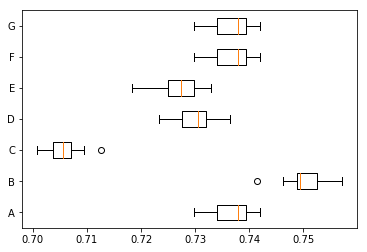

In [13]:
plt.boxplot(accuracy, vert=False, labels=['A','B','C','D','E','F','G'])

In [ ]:
def expand_2(X):    
    result = X.copy()
    result = np.c_[result, np.power(result, 2)]
    n,d = X.shape
    for j in range(d):
        print(j)
        result = np.c_[result, result[:,j][:,np.newaxis] * result[:,j+1:]]
        
    return result